In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Lwandile\Documents\Python\Gender Equality indicators in South Africa\South Africa.csv")
df

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value
0,"Received government transfer or pension, male ...",fin37.38.t.d.2,South Africa,ZAF,2021,30.050
1,"Received government transfer or pension, male ...",fin37.38.t.d.2,South Africa,ZAF,2017,20.990
2,"Population ages 70-74, male",SP.POP.7074.MA,South Africa,ZAF,2023,345767.000
3,"Population ages 70-74, male",SP.POP.7074.MA,South Africa,ZAF,2022,347139.000
4,"Population ages 70-74, male",SP.POP.7074.MA,South Africa,ZAF,2021,347923.000
...,...,...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,South Africa,ZAF,1964,1.040
16051,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,South Africa,ZAF,1963,1.040
16052,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,South Africa,ZAF,1962,1.040
16053,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,South Africa,ZAF,1961,1.040


In [3]:
df.isnull().sum()

Indicator Name    0
Indicator Code    0
Country Name      0
Country Code      0
Year              0
Value             0
dtype: int64

In [3]:
# Dropping unnecessary columns

columns_to_drop = ['Indicator Code', 'Country Code', 'Country Name']

df = df.drop(columns = columns_to_drop)
df

,Indicator Name,Year,Value
0,"Received government transfer or pension, male ...",2021,30.050
1,"Received government transfer or pension, male ...",2017,20.990
2,"Population ages 70-74, male",2023,345767.000
3,"Population ages 70-74, male",2022,347139.000
4,"Population ages 70-74, male",2021,347923.000
...,...,...,...
16050,Sex ratio at birth (male births per female bir...,1964,1.040
16051,Sex ratio at birth (male births per female bir...,1963,1.040
16052,Sex ratio at birth (male births per female bir...,1962,1.040
16053,Sex ratio at birth (male births per female bir...,1961,1.040


In [5]:
df['Indicator Name'].nunique()

979

In [6]:
df['Indicator Name'].unique()

array(['Received government transfer or pension, male (% age 15+)',
       'Population ages 70-74, male',
       'Primary completion rate, male (% of relevant age group)',
       'Employers, female (% of female employment) (modeled ILO estimate)',
       'Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)',
       'Received government transfer or pension, female (% age 15+)',
       'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+, male (% of male population ages 60+)',
       'Labor force with basic education, female (% of female working-age population with basic education)',
       'Population ages 30-34, female',
       'Comprehensive correct knowledge of HIV/AIDS, ages 15-24, male (2 prevent ways and reject 3 misconceptions)',
       'Unemployment, youth male (% of male labor force ages 15-24) (national estimate)',
       'Percentage of students in upper second

Making seperate columns for the indicators in the indicator name column

In [4]:
#Creating the Health and Mortality columnS

def health_and_mortality_indicators(x):
    if x == "Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)":
        return "Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)"
    if x == "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+, male (% of male population ages 60+)":
        return "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+, male (% of male population ages 60+)"
    if x == "Cause of death, by injury, ages 15-59, female (% of female population ages 15-59)":
        return "Cause of death, by injury, ages 15-59, female (% of female population ages 15-59)"
    if x == "Cause of death, by non-communicable diseases, ages 60+ (% of population ages 60+)":
        return "Cause of death, by non-communicable diseases, ages 60+ (% of population ages 60+)"
    if x == "Cause of death, by non-communicable diseases, ages 0-4, male (% of male population ages 0-4)":
        return "Cause of death, by non-communicable diseases, ages 0-4, male (% of male population ages 0-4)"
    if x == "Cause of death, by non-communicable diseases, ages 15-59, female (% of female population ages 15-59)":
        return "Cause of death, by non-communicable diseases, ages 15-59, female (% of female population ages 15-59)"
    if x == "Mortality caused by road traffic injury, female (per 100,000 female population)":
        return "Mortality caused by road traffic injury, female (per 100,000 female population)"
    if x == "Suicide mortality rate, female (per 100,000 female population)":
        return "Suicide mortality rate, female (per 100,000 female population)"
    if x == "Cause of death, by injury (% of total)":
        return "Cause of death, by injury (% of total)"
    if x == "Cause of death, by injury, ages 5-14, female (% of female population ages 5-14)":
        return "Cause of death, by injury, ages 5-14, female (% of female population ages 5-14)"
    if x == "Cause of death, by injury, ages 5-14 (% of population ages 5-14)":
        return "Cause of death, by injury, ages 5-14 (% of population ages 5-14)"
    if x == "Prevalence of current tobacco use, females (% of female adults)":
        return "Prevalence of current tobacco use, females (% of female adults)"
    if x == "Prevalence of overweight (% of adults)":
        return "Prevalence of overweight (% of adults)"
    if x == "Prevalence of wasting, weight for height (% of children under 5)":
        return "Prevalence of wasting, weight for height (% of children under 5)"
    if x == "Prevalence of severe wasting, weight for height (% of children under 5)":
        return "Prevalence of severe wasting, weight for height (% of children under 5)"
    if x == "Life expectancy at birth, male (years)":
        return "Life expectancy at birth, male (years)"
    if x == "Life expectancy at age 60, female":
        return "Life expectancy at age 60, female"
    if x == "Mortality rate, infant, male (per 1,000 live births)":
        return "Mortality rate, infant, male (per 1,000 live births)"
    if x == "Mortality rate, adult, female (per 1,000 female adults)":
        return "Mortality rate, adult, female (per 1,000 female adults)"
    if x == "Mortality rate, adult, male (per 1,000 male adults)":
        return "Mortality rate, adult, male (per 1,000 male adults)"
    if x == "Mortality caused by road traffic injury (per 100,000 population)":
        return "Mortality caused by road traffic injury (per 100,000 population)"
    if x == "Cause of death, by injury, ages 15-59 (% of population ages 15-59)":
        return "Cause of death, by injury, ages 15-59 (% of population ages 15-59)"
    if x == "Cause of death, by injury, female (% of female population)":
        return "Cause of death, by injury, female (% of female population)"
    if x == "Cause of death, by injury, ages 0-4, male (% of male population ages 0-4)":
        return "Cause of death, by injury, ages 0-4, male (% of male population ages 0-4)"
    if x == "Cause of death, by non-communicable diseases, female (% of female population)":
        return "Cause of death, by non-communicable diseases, female (% of female population)"
    if x == "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+, female (% of female population ages 60+)":
        return "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+, female (% of female population ages 60+)"
    if x == "Immunization, DPT (% of children ages 12-23 months)":
        return "Immunization, DPT (% of children ages 12-23 months)"
    if x == "Prevalence of obesity, female (% of female population ages 18+)":
        return "Prevalence of obesity, female (% of female population ages 18+)"
    if x == "Mortality rate, under-5 (per 1,000 live births)":
        return "Mortality rate, under-5 (per 1,000 live births)"
    if x == "Mortality rate, under-5, male (per 1,000 live births)":
        return "Mortality rate, under-5, male (per 1,000 live births)"
    if x == "Mortality rate attributed to unintentional poisoning (per 100,000 population)":
        return "Mortality rate attributed to unintentional poisoning (per 100,000 population)"
    if x == "Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)":
        return "Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)"
    if x == "Prevalence of overweight, weight for height, female (% of children under 5)":
        return "Prevalence of overweight, weight for height, female (% of children under 5)"
    if x == "Prevalence of overweight, weight for height, male (% of children under 5)":
        return "Prevalence of overweight, weight for height, male (% of children under 5)"
    if x == "Prevalence of HIV, male (% ages 15-24)":
        return "Prevalence of HIV, male (% ages 15-24)"
    if x == "Prevalence of anaemia in children aged 6-59 months (%)":
        return "Prevalence of anaemia in children aged 6-59 months (%)"
    if x == "Prevalence of anaemia in women of reproductive age (aged 15-49) (%)":
        return "Prevalence of anaemia in women of reproductive age (aged 15-49) (%)"
    if x == "Cause of death, by injury, ages 0-4 (% of population ages 0-4)":
        return "Cause of death, by injury, ages 0-4 (% of population ages 0-4)"
    if x == "Cause of death, by injury, ages 60+, female (% of female population ages 60+)":
        return "Cause of death, by injury, ages 60+, female (% of female population ages 60+)"
    if x == "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4, male (% of male population ages 0-4)":
        return "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4, male (% of male population ages 0-4)"
    if x == "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 5-14 (% of population ages 5-14)":
        return "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 5-14 (% of population ages 5-14)"
    if x == "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 15-59, male (% of male population ages 15-59)":
        return "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 15-59, male (% of male population ages 15-59)"
    if x == "Cause of death, by non-communicable diseases, male (% of male population)":
        return "Cause of death, by non-communicable diseases, male (% of male population)"
    if x == "Cause of death, by non-communicable diseases, ages 0-4 (% of population ages 0-4)":
        return "Cause of death, by non-communicable diseases, ages 0-4 (% of population ages 0-4)"
    if x == "Mortality caused by road traffic injury, male (per 100,000 male population)":
        return "Mortality caused by road traffic injury, male (per 100,000 male population)"
    if x == "Number of infant deaths":
        return "Number of infant deaths"
    if x == "Number of infant deaths, male":
        return "Number of infant deaths, male"
    if x == "Number of under-five deaths, female":
        return "Number of under-five deaths, female"
    if x =="Incidence of HIV, ages 15-24 (per 1,000 uninfected population ages 15-24)":
        return "Incidence of HIV, ages 15-24 (per 1,000 uninfected population ages 15-24)"
    if x == "Antiretroviral therapy coverage (% of adult females living with HIV)":
        return "Antiretroviral therapy coverage (% of adult females living with HIV)"
    if x =="Prevalence of HIV, female (% ages 15-24)":
        return "Prevalence of HIV, female (% ages 15-24)"
    if x == "Cause of death, by injury, ages 15-59, male (% of male population ages 15-59)":
        return "Cause of death, by injury, ages 15-59, male (% of male population ages 15-59)"
    if x =="Cause of death, by non-communicable diseases, ages 0-4, female (% of female population ages 0-4)":
        return "Cause of death, by non-communicable diseases, ages 0-4, female (% of female population ages 0-4)"
    if x == "Cause of death, by non-communicable diseases, ages 5-14, male (% of male population ages 5-14)":
        return "Cause of death, by non-communicable diseases, ages 5-14, male (% of male population ages 5-14)"
    if x == "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+ (% of population ages 60+)":
        return "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 60+ (% of population ages 60+)"
    if x == "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4, female (% of female population ages 0-4)":
        return "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4, female (% of female population ages 0-4)"
    if x == "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, male (% of male population)":
        return "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, male (% of male population)"
    if x == "Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population)":
        return "Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population)"
    if x == "Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)":
        return "Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)"
    if x == "Lifetime risk of maternal death (%)":
        return "Lifetime risk of maternal death (%)"
    if x == "Cause of death, by injury, ages 60+ (% of population ages 60+)":
        return "Cause of death, by injury, ages 60+ (% of population ages 60+)"
    if x == "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)":
        return "Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)"
    if x == "Mortality rate, infant, female (per 1,000 live births)":
        return "Mortality rate, infant, female (per 1,000 live births)"
    if x == "Mortality rate attributed to unsafe water, unsafe sanitation, and lack of hygiene, female (per 100,000 female population)":
        return "Mortality rate attributed to unsafe water, unsafe sanitation, and lack of hygiene, female (per 100,000 female population)"
    if x == "Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)":
        return "Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)"
    if x == "Number of maternal deaths":
        return "Number of maternal deaths"
    if x == "Prevalence of overweight, female (% of female adults)":
        return "Prevalence of overweight, female (% of female adults)"
    if x == "Prevalence of obesity, male (% of male population ages 18+)":
        return "Prevalence of obesity, male (% of male population ages 18+)"
    if x == "Cause of death, by non-communicable diseases, ages 5-14 (% of population ages 5-14)":
        return "Cause of death, by non-communicable diseases, ages 5-14 (% of population ages 5-14)"
    if x == "Cause of death, by non-communicable diseases, ages 15-59, male (% of male population ages 15-59)":
        return "Cause of death, by non-communicable diseases, ages 15-59, male (% of male population ages 15-59)"
    if x == "Fertility rate, total (births per woman)":
        return "Fertility rate, total (births per woman)"
    if x == "Intentional homicides, male (per 100,000 male)":
        return "Intentional homicides, male (per 100,000 male)"
    if x == 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)':
        return 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)'
    if x == 'Prevalence of anemia among non-pregnant women (% of women ages 15-49)':
        return 'Prevalence of anemia among non-pregnant women (% of women ages 15-49)'
    if x == 'Cause of death, by injury, ages 0-4, female (% of female population ages 0-4)':
        return 'Cause of death, by injury, ages 0-4, female (% of female population ages 0-4)'
    if x == 'Cause of death, by injury, ages 60+, male (% of male population ages 60+)':
        return 'Cause of death, by injury, ages 60+, male (% of male population ages 60+)'
    if x == 'Prevalence of current tobacco use, males (% of male adults)':
        return 'Prevalence of current tobacco use, males (% of male adults)'
    if x == 'Prevalence of overweight, male (% of male adults)':
        return 'Prevalence of overweight, male (% of male adults)'
    if x == 'Antiretroviral therapy coverage (% of adult males living with HIV)':
        return 'Antiretroviral therapy coverage (% of adult males living with HIV)'
    if x == 'Number of infant deaths, female':
        return 'Number of infant deaths, female'
    if x == 'Life expectancy at birth, female (years)':
        return 'Life expectancy at birth, female (years)'
    if x == 'Life expectancy at age 60, male':
        return 'Life expectancy at age 60, male'


    
    
    
df['Health and Mortality'] = df['Indicator Name'].apply(health_and_mortality_indicators)

df

,Indicator Name,Year,Value,Health and Mortality
0,"Received government transfer or pension, male ...",2021,30.050,None
1,"Received government transfer or pension, male ...",2017,20.990,None
2,"Population ages 70-74, male",2023,345767.000,None
3,"Population ages 70-74, male",2022,347139.000,None
4,"Population ages 70-74, male",2021,347923.000,None
...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,1964,1.040,None
16051,Sex ratio at birth (male births per female bir...,1963,1.040,None
16052,Sex ratio at birth (male births per female bir...,1962,1.040,None
16053,Sex ratio at birth (male births per female bir...,1961,1.040,None


In [5]:
df['Health and Mortality'].nunique()

79

In [5]:
# Creating the laboour and emplyment column

def labour_and_employment_indicators(y):
    if y == "Employers, female (% of female employment) (modeled ILO estimate)":
        return "Employers, female (% of female employment) (modeled ILO estimate)"
    if y == "Labor force with basic education, female (% of female working-age population with basic education)":
        return "Labor force with basic education, female (% of female working-age population with basic education)"
    if y == "Unemployment, youth male (% of male labor force ages 15-24) (national estimate)":
        return "Unemployment, youth male (% of male labor force ages 15-24) (national estimate)"
    if y == "Human capital index (HCI), male (scale 0-1)":
        return "Human capital index (HCI), male (scale 0-1)"
    if y == "Female share of employment in senior and middle management (%)":
        return "Female share of employment in senior and middle management (%)"
    if y == "Part time employment, total (% of total employment)":
        return "Part time employment, total (% of total employment)"
    if y == "Employment in industry (% of total employment) (modeled ILO estimate)":
        return "Employment in industry (% of total employment) (modeled ILO estimate)"
    if y == "Employers, total (% of total employment) (modeled ILO estimate)":
        return "Employers, total (% of total employment) (modeled ILO estimate)"
    if y == "Wage and salaried workers, male (% of male employment) (modeled ILO estimate)":
        return "Wage and salaried workers, male (% of male employment) (modeled ILO estimate)"
    if y == "Informal employment, female (% of total non-agricultural employment)":
        return "Informal employment, female (% of total non-agricultural employment)"
    if y == "Vulnerable employment, female (% of female employment) (modeled ILO estimate)":
        return "Vulnerable employment, female (% of female employment) (modeled ILO estimate)"
    if y == "Labor force participation rate, male (% of male population ages 15+) (national estimate)":
        return "Labor force participation rate, male (% of male population ages 15+) (national estimate)"
    if y == "Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)":
        return "Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)"
    if y == "Labor force with advanced education (% of total working-age population with advanced education)":
        return "Labor force with advanced education (% of total working-age population with advanced education)"
    if y == "Labor force, female (% of total labor force)":
        return "Labor force, female (% of total labor force)"
    if y == "Self-employed, total (% of total employment) (modeled ILO estimate)":
        return "Self-employed, total (% of total employment) (modeled ILO estimate)"
    if y == "Part time employment, female (% of total female employment)":
        return "Part time employment, female (% of total female employment)"
    if y == "Wage and salaried workers, female (% of female employment) (modeled ILO estimate)":
        return "Wage and salaried workers, female (% of female employment) (modeled ILO estimate)"
    if y == "Labor force with intermediate education, female (% of female working-age population with intermediate education)":
        return "Labor force with intermediate education, female (% of female working-age population with intermediate education)"
    if y == "Unemployment, total (% of total labor force) (modeled ILO estimate)":
        return "Unemployment, total (% of total labor force) (modeled ILO estimate)"
    if y == "Vulnerable employment, total (% of total employment) (modeled ILO estimate)":
        return "Vulnerable employment, total (% of total employment) (modeled ILO estimate)"
    if y == "Labor force with intermediate education (% of total working-age population with intermediate education)":
        return "Labor force with intermediate education (% of total working-age population with intermediate education)"
    if y == "Wage and salaried workers, total (% of total employment) (modeled ILO estimate)":
        return "Wage and salaried workers, total (% of total employment) (modeled ILO estimate)"
    if y == "Employment in services (% of total employment) (modeled ILO estimate)":
        return "Employment in services (% of total employment) (modeled ILO estimate)"
    if y == "Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)":
        return "Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)"
    if y == "Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)":
        return "Employment to population ratio, ages 15-24, male (%) (modeled ILO estimate)"
    if y == "Women in the Workforce":
        return "Women in the Workforce"
    if y == "Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)":
        return "Labor force participation rate for ages 15-24, male (%) (modeled ILO estimate)"
    if y == "Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)":
        return "Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)"
    if y == "Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)":
        return "Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)"
    if y == "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)":
        return "Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)"
    if y == "Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)":
        return "Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)"
    if y == "Labor force participation rate for ages 15-24, male (%) (national estimate)":
        return "Labor force participation rate for ages 15-24, male (%) (national estimate)"
    if y == "Labor force participation rate for ages 15-24, total (%) (national estimate)":
        return "Labor force participation rate for ages 15-24, total (%) (national estimate)"
    if y == "Labor force participation rate, female (% of female population ages 15+) (national estimate)":
        return "Labor force participation rate, female (% of female population ages 15+) (national estimate)"
    if y == "Labor force, female":
        return "Labor force, female"
    if y == "Employment in agriculture, female (% of female employment) (modeled ILO estimate)":
        return "Employment in agriculture, female (% of female employment) (modeled ILO estimate)"
    if y == "Employment in industry, female (% of female employment) (modeled ILO estimate)":
        return "Employment in industry, female (% of female employment) (modeled ILO estimate)"
    if y == "Informal employment, male (% of total non-agricultural employment)":
        return "Informal employment, male (% of total non-agricultural employment)"
    if y == "Vulnerable employment, male (% of male employment) (modeled ILO estimate)":
        return "Vulnerable employment, male (% of male employment) (modeled ILO estimate)"
    if y == "Unemployment with intermediate education, female (% of female labor force with intermediate education)":
        return "Unemployment with intermediate education, female (% of female labor force with intermediate education)"
    if y == "Unemployment with advanced education (% of total labor force with advanced education)":
        return "Unemployment with advanced education (% of total labor force with advanced education)"
    if y == "Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)":
        return "Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)"
    if y == "Unemployment, male (% of male labor force) (modeled ILO estimate)":
        return "Unemployment, male (% of male labor force) (modeled ILO estimate)"
    if y == "Unemployment, youth female (% of female labor force ages 15-24) (national estimate)":
        return "Unemployment, youth female (% of female labor force ages 15-24) (national estimate)"
    if y == "Unemployment, female (% of female labor force) (national estimate)":
        return "Unemployment, female (% of female labor force) (national estimate)"
    if y == "Number of male directors":
        return "Number of male directors"
    if y == 'Number of female directors':
        return 'Number of female directors'
    if y == 'Self-employed, female (% of female employment) (modeled ILO estimate)':
        return 'Self-employed, female (% of female employment) (modeled ILO estimate)'
    if y == 'Self-employed, male (% of male employment) (modeled ILO estimate)':
        return 'Self-employed, male (% of male employment) (modeled ILO estimate)'
    if y == 'Employers, male (% of male employment) (modeled ILO estimate)':
        return 'Employers, male (% of male employment) (modeled ILO estimate)'
    if y == 'Part time employment, male (% of total male employment)':
        return 'Part time employment, male (% of total male employment)'
    if y == 'Employment in industry, male (% of male employment) (modeled ILO estimate)':
        return 'Employment in industry, male (% of male employment) (modeled ILO estimate)'
    if y == 'Employment in services, female (% of female employment) (modeled ILO estimate)':
        return 'Employment in services, female (% of female employment) (modeled ILO estimate)'
    if y == 'Employment in services, male (% of male employment) (modeled ILO estimate)':
        return 'Employment in services, male (% of male employment) (modeled ILO estimate)'
    if y == 'Employment in agriculture, male (% of male employment) (modeled ILO estimate)':
        return  'Employment in agriculture, male (% of male employment) (modeled ILO estimate)'


    
df['Labour and Employment'] = df['Indicator Name'].apply(labour_and_employment_indicators)

df

,Indicator Name,Year,Value,Health and Mortality,Labour and Employment
0,"Received government transfer or pension, male ...",2021,30.050,None,None
1,"Received government transfer or pension, male ...",2017,20.990,None,None
2,"Population ages 70-74, male",2023,345767.000,None,None
3,"Population ages 70-74, male",2022,347139.000,None,None
4,"Population ages 70-74, male",2021,347923.000,None,None
...,...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,1964,1.040,None,None
16051,Sex ratio at birth (male births per female bir...,1963,1.040,None,None
16052,Sex ratio at birth (male births per female bir...,1962,1.040,None,None
16053,Sex ratio at birth (male births per female bir...,1961,1.040,None,None


In [102]:
df['Labour and Employment'].nunique()

56

In [6]:
#Creating the Women's Rights and empowerment column

def womens_rights(a):
    if a == "Women, Business and the Law: Marriage Indicator Score (scale 1-100)":
        return "Women, Business and the Law: Marriage Indicator Score (scale 1-100)"
    if a == "Women, Business and the Law: Mobility Indicator Score (scale 1-100)":
        return "Women, Business and the Law: Mobility Indicator Score (scale 1-100)"
    if a == "Women, Business and the Law: Pay Indicator Score (scale 1-100)":
        return "Women, Business and the Law: Pay Indicator Score (scale 1-100)"
    if a == "Women, Business and the Law: Pension Indicator Score (scale 1-100)":
        return "Women, Business and the Law: Pension Indicator Score (scale 1-100)"
    if a == "Women, Business and the Law: Parenthood Indicator Score (scale 1-100)":
        return "Women, Business and the Law: Parenthood Indicator Score (scale 1-100)"
    if a == "A woman can apply for a passport in the same way as a man (1=yes; 0=no)":
        return "A woman can apply for a passport in the same way as a man (1=yes; 0=no)"
    if a == "A woman can choose where to live in the same way as a man (1=yes; 0=no)":
        return "A woman can choose where to live in the same way as a man (1=yes; 0=no)"
    if a == "A woman can work at night in the same way as a man (1=yes; 0=no)":
        return "A woman can work at night in the same way as a man (1=yes; 0=no)"
    if a == "Women who believe a husband is justified in beating his wife when she neglects the children (%): Q1 (lowest)":
        return "Women who believe a husband is justified in beating his wife when she neglects the children (%): Q1 (lowest)"
    if a == "Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q5 (highest)":
        return "Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q5 (highest)"
    if a == "Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q1 (lowest)":
        return "Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q1 (lowest)"
    if a == "Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q4":
        return "Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q4"
    if a == "Women who experienced first sexual violence before age 18 (% of women ages 15-49)":
        return "Women who experienced first sexual violence before age 18 (% of women ages 15-49)"
    if a == "Women who initiated sexual intercourse before age 15 (% of women ages 15-19)":
        return "Women who initiated sexual intercourse before age 15 (% of women ages 15-19)"
    if a == "Women who were first married by age 15 (% of women ages 20-24)":
        return "Women who were first married by age 15 (% of women ages 20-24)"
    if a == "Women who believe a husband is justified in beating his wife when she burns the food (%): Q1 (lowest)":
        return "Women who believe a husband is justified in beating his wife when she burns the food (%): Q1 (lowest)"
    if a == "Women who believe a husband is justified in beating his wife when she neglects the children (%): Q5 (highest)":
        return "Women who believe a husband is justified in beating his wife when she neglects the children (%): Q5 (highest)"
    if a == "Women who believe a husband is justified in beating his wife when she argues with him (%): Q2":
        return "Women who believe a husband is justified in beating his wife when she argues with him (%): Q2"
    if a == "Women who believe a husband is justified in beating his wife (any of five reasons) (%): Q4":
        return "Women who believe a husband is justified in beating his wife (any of five reasons) (%): Q4"
    if a == "Women, Business and the Law: Assets Indicator Score (scale 1-100)":
        return "Women, Business and the Law: Assets Indicator Score (scale 1-100)"
    if a == "Women, Business and the Law: Entrepreneurship Indicator Score (scale 1-100)":
        return "Women, Business and the Law: Entrepreneurship Indicator Score (scale 1-100)"
    if a == "The law prohibits discrimination in access to credit based on gender (1=yes; 0=no)":
        return "The law prohibits discrimination in access to credit based on gender (1=yes; 0=no)"
    if a == "The law prohibits discrimination in employment based on gender (1=yes; 0=no)":
        return "The law prohibits discrimination in employment based on gender (1=yes; 0=no)"
    if a == "The mandatory retirement age for women and men is the same (1=yes; 0=no)":
        return "The mandatory retirement age for women and men is the same (1=yes; 0=no)"
    if a == "The age at which women and men can retire with full pension benefits is the same (1=yes; 0=no)":
        return "The age at which women and men can retire with full pension benefits is the same (1=yes; 0=no)"
    if a == "Decision maker about a woman's visits to her family or relatives: mainly husband (% of women age 15-49)":
        return "Decision maker about a woman's visits to her family or relatives: mainly husband (% of women age 15-49)"
    if a == "Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)":
        return 'Women making their own informed decisions regarding sexual relations, contraceptive use and reproductive health care (% of women age 15-49)'
    if a == "Women who initiated sexual intercourse before age 15 (% of women ages 15-19)":
        return "Women who initiated sexual intercourse before age 15 (% of women ages 15-19)"
    if a == "A woman can sign a contract in the same way as a man (1=yes; 0=no)":
        return "A woman can sign a contract in the same way as a man (1=yes; 0=no)"
    if a == "A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no)":
        return "A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no)"
    if a == "A woman can open a bank account in the same way as a man (1=yes; 0=no)":
        return "A woman can open a bank account in the same way as a man (1=yes; 0=no)"
    if a == "A woman can travel outside the country in the same way as a man (1=yes; 0=no)":
        return "A woman can travel outside the country in the same way as a man (1=yes; 0=no)"
    if a == "A woman can travel outside her home in the same way as a man (1=yes; 0=no)":
        return "A woman can travel outside her home in the same way as a man (1=yes; 0=no)"
    if a == "A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no)":
        return "A woman can work in a job deemed dangerous in the same way as a man (1=yes; 0=no)"
    if a == "Women who believe a husband is justified in beating his wife when she neglects the children (%): Q2":
        return "Women who believe a husband is justified in beating his wife when she neglects the children (%): Q2"
    if a == "Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q4":
        return "Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q4"
    if a == "Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q3":
        return "Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q3"
    if a == "Women who believe a husband is justified in beating his wife when she burns the food (%): Q3":
        return "Women who believe a husband is justified in beating his wife when she burns the food (%): Q3"
    if a == "Women who believe a husband is justified in beating his wife when she argues with him (%)":
        return "Women who believe a husband is justified in beating his wife when she argues with him (%)"
    if a == "Women who participate in making major household purchase decisions (% of women age 15-49)":
        return "Women who participate in making major household purchase decisions (% of women age 15-49)"
    if a == "Women who initiated sexual intercourse by age 15 (% of women ages 20-24)":
        return "Women who initiated sexual intercourse by age 15 (% of women ages 20-24)"
    if a == "Women who were first married by age 18 (% of women ages 20-24)":
        return "Women who were first married by age 18 (% of women ages 20-24)"
    if a == "Proportion of women who have ever experienced intimate partner violence (% of ever-partnered women ages 15-49)":
        return "Proportion of women who have ever experienced intimate partner violence (% of ever-partnered women ages 15-49)"
    if a == "Proportion of women who have ever experienced intimate partner violence (modeled estimate, % of ever-partnered women ages 15-49)":
        return "Proportion of women who have ever experienced intimate partner violence (modeled estimate, % of ever-partnered women ages 15-49)"
    if a == "Decision maker about a woman's visits to her family or relatives: mainly wife (% of women age 15-49)":
        return "Decision maker about a woman's visits to her family or relatives: mainly wife (% of women age 15-49)"
    if a == "Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q1 (lowest)":
        return "Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q1 (lowest)"
    if a == "Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q2":
        return "Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q2"
    if a == "Women who believe a husband is justified in beating his wife (any of five reasons) (%): Q2":
        return "Women who believe a husband is justified in beating his wife (any of five reasons) (%): Q2"
    if a == "Women who believe a husband is justified in beating his wife when she burns the food (%): Q4":
        return "Women who believe a husband is justified in beating his wife when she burns the food (%): Q4"
    if a == "omen who believe a husband is justified in beating his wife (any of five reasons) (%): Q3":
        return "omen who believe a husband is justified in beating his wife (any of five reasons) (%): Q3"
    if a == "Women who own a house both alone and jointly (% of women age 15-49): Q1 (lowest)":
        return "Women who own a house both alone and jointly (% of women age 15-49): Q1 (lowest)"
    if a == "Women who own a house both alone and jointly (% of women age 15-49)":
        return "Women who own a house both alone and jointly (% of women age 15-49)"
    if a == "Women participating in none of the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)":
        return "Women participating in none of the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)"
    if a == "Decision maker about a woman's own health care: someone else (% of women age 15-49)":
        return "Decision maker about a woman's own health care: someone else (% of women age 15-49)"
    if a == "Decision maker about a woman's own health care: mainly wife (% of women age 15-49)":
        return "Decision maker about a woman's own health care: mainly wife (% of women age 15-49)"
    if a == "Decision maker about major household purchases: other (% of women age 15-49)":
        return "Decision maker about major household purchases: other (% of women age 15-49)"
    if a == 'A woman can be "head of household" in the same way as a man (1=yes; 0=no)':
        return 'A woman can be "head of household" in the same way as a man (1=yes; 0=no)'
    if a == "Decision maker about a woman's own health care: wife and husband jointly (% of women age 15-49)":
        return "Decision maker about a woman's own health care: wife and husband jointly (% of women age 15-49)"
    if a == "Decision maker about major household purchases: wife and husband jointly (% of women age 15-49)":
        return "Decision maker about major household purchases: wife and husband jointly (% of women age 15-49)"
    if a == "A woman has the same rights to remarry as a man (1=yes; 0=no)":
        return "A woman has the same rights to remarry as a man (1=yes; 0=no)"
    if a == "Women and men have equal ownership rights to immovable property (1=yes; 0=no)":
        return "Women and men have equal ownership rights to immovable property (1=yes; 0=no)"
    if a == "Women who believe a husband is justified in beating his wife when she argues with him (%): Q1 (lowest)":
        return "Women who believe a husband is justified in beating his wife when she argues with him (%): Q1 (lowest)"
    if a == "Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q5 (highest)":
        return "Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q5 (highest)"
    if a == "Women who believe a husband is justified in beating his wife when she refuses sex with him (%)":
        return "Women who believe a husband is justified in beating his wife when she refuses sex with him (%)"
    if a == "Women who believe a husband is justified in beating his wife when she burns the food (%): Q2":
        return "Women who believe a husband is justified in beating his wife when she burns the food (%): Q2"
    if a == "Women who believe a husband is justified in beating his wife when she neglects the children (%): Q4":
        return "Women who believe a husband is justified in beating his wife when she neglects the children (%): Q4"
    if a == "The law provides for the valuation of nonmonetary contributions (1=yes; 0=no)":
        return "The law provides for the valuation of nonmonetary contributions (1=yes; 0=no)"
    if a == "The law is free of legal provisions that require a married woman to obey her husband (1=yes; 0=no)":
        return "The law is free of legal provisions that require a married woman to obey her husband (1=yes; 0=no)"
    if a == "Dismissal of pregnant workers is prohibited (1=yes; 0=no)":
        return "Dismissal of pregnant workers is prohibited (1=yes; 0=no)"
    if a == "Paid leave of at least 14 weeks available to mothers (1=yes; 0=no)":
        return "Paid leave of at least 14 weeks available to mothers (1=yes; 0=no)"
    if a == "Proportion of women in ministerial level positions (%)":
        return "Proportion of women in ministerial level positions (%)"
    if a == "There is legislation on sexual harassment in employment (1=yes; 0=no)":
        return "There is legislation on sexual harassment in employment (1=yes; 0=no)"
    if a == "Decision maker about major household purchases: mainly wife (% of women age 15-49)":
        return "Decision maker about major household purchases: mainly wife (% of women age 15-49)"
    if a == "Decision maker about a woman's visits to her family or relatives: someone else (% of women age 15-49)":
        return "Decision maker about a woman's visits to her family or relatives: someone else (% of women age 15-49)"
    if a == "Time required to start a business, female (days)":
        return "Time required to start a business, female (days)"
    if a == "Length of paid parental leave for mother (calendar days)":
        return "Length of paid parental leave for mother (calendar days)"
    if a == "A woman can register a business in the same way as a man (1=yes; 0=no)":
        return "A woman can register a business in the same way as a man (1=yes; 0=no)"
    

    
df["Women's Rights and Empowerment"] = df ['Indicator Name'].apply(womens_rights)
df
  

,Indicator Name,Year,Value,Health and Mortality,Labour and Employment,Women's Rights and Empowerment
0,"Received government transfer or pension, male ...",2021,30.050,None,None,None
1,"Received government transfer or pension, male ...",2017,20.990,None,None,None
2,"Population ages 70-74, male",2023,345767.000,None,None,None
3,"Population ages 70-74, male",2022,347139.000,None,None,None
4,"Population ages 70-74, male",2021,347923.000,None,None,None
...,...,...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,1964,1.040,None,None,None
16051,Sex ratio at birth (male births per female bir...,1963,1.040,None,None,None
16052,Sex ratio at birth (male births per female bir...,1962,1.040,None,None,None
16053,Sex ratio at birth (male births per female bir...,1961,1.040,None,None,None


In [18]:
df["Women's Rights and Empowerment"].nunique()

69

In [7]:
# Creating the Education column

def education(b):
    if b == "Primary completion rate, male (% of relevant age group)":
        return "Primary completion rate, male (% of relevant age group)"
    if b == 'Percentage of students in upper secondary vocational education who are female (%)':
        return 'Percentage of students in upper secondary vocational education who are female (%)'
    if b == "Lower secondary completion rate, female (% of relevant age group)":
        return 'Lower secondary completion rate, female (% of relevant age group)'
    if b == 'Net intake rate in grade 1, male (% of official school-age population)':
        return 'Net intake rate in grade 1, male (% of official school-age population)'
    if b == 'School enrollment, primary, male (% net)':
        return 'School enrollment, primary, male (% net)'
    if b == 'Youth illiterate population, 15-24 years, female (number)':
        return 'Youth illiterate population, 15-24 years, female (number)'
    if b == 'School enrollment, secondary, male (% net)':
        return 'School enrollment, secondary, male (% net)'
    if b == 'Female share of graduates in services (%, tertiary)':
        return 'Female share of graduates in services (%, tertiary)'
    if b == 'Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes (%, tertiary)':
        return 'Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes (%, tertiary)'
    if b == 'Gross graduation ratio, tertiary, male (%)':
        return 'Gross graduation ratio, tertiary, male (%)'
    if b == 'Literacy rate, youth female (% of females ages 15-24)':
        return 'Literacy rate, youth female (% of females ages 15-24)'
    if b == 'School enrollment, tertiary, female (% gross)':
        return 'School enrollment, tertiary, female (% gross)'
    if b == 'School enrollment, secondary (% net)':
        return 'School enrollment, secondary (% net)'
    if b == 'Vocational and Technical enrolment (% of total secondary enrolment), total':
        return 'Vocational and Technical enrolment (% of total secondary enrolment), total'
    if b == 'Secondary education, teachers (% female)':
        return 'Secondary education, teachers (% female)'
    if b == 'School enrollment, tertiary, male (% gross)':
        return 'School enrollment, tertiary, male (% gross)'
    if b == 'School enrollment, secondary, male (% gross)':
        return 'School enrollment, secondary, male (% gross)'
    if b == 'Primary completion rate, total (% of relevant age group)':
        return 'Primary completion rate, total (% of relevant age group)'
    if b == 'Net intake rate in grade 1 (% of official school-age population)':
        return 'Net intake rate in grade 1 (% of official school-age population)'
    if b == 'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)':
        return 'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)'
    if b == 'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)':
        return 'Educational attainment, at least completed lower secondary, population 25+, total (%) (cumulative)'
    if b == "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)":
        return "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)"
    if b == 'Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)':
        return 'Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)'
    if b == "Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)":
        return "Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)"
    if b == 'Tertiary education, academic staff (% female)':
        return 'Tertiary education, academic staff (% female)'
    if b == 'Female share of graduates in health and welfare (%, tertiary)':
        return 'Female share of graduates in health and welfare (%, tertiary)'
    if b == 'Female share of graduates in engineering, manufacturing and construction (%, tertiary)':
        return 'Female share of graduates in engineering, manufacturing and construction (%, tertiary)'
    if b == 'Female share of graduates in business, administration and law (%, tertiary)':
        return 'Female share of graduates in business, administration and law (%, tertiary)'
    if b == 'Harmonized Test Scores, Female':
        return 'Harmonized Test Scores, Female'
    if b == 'Harmonized Test Scores':
        return 'Harmonized Test Scores'
    if b == 'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)':
        return 'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)'
    if b == "Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)":
        return "Educational attainment, at least Master's or equivalent, population 25+, total (%) (cumulative)"
    if b == 'Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)':
        return 'Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)'
    if b == 'Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative)':
        return 'Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative)'
    if b == 'Gross intake ratio in first grade of primary education, total (% of relevant age group)':
        return 'Gross intake ratio in first grade of primary education, total (% of relevant age group)'
    if b == 'Vocational and Technical enrolment (% of total secondary enrolment), female':
        return 'Vocational and Technical enrolment (% of total secondary enrolment), female'
    if b == 'Progression to secondary school, male (%)':
        return 'Progression to secondary school, male (%)'
    if b == 'Secondary education, vocational pupils (% female)':
        return 'Secondary education, vocational pupils (% female)'
    if b == 'School enrollment, primary (gross), gender parity index (GPI)':
        return 'School enrollment, primary (gross), gender parity index (GPI)'
    if b == 'Net intake rate in grade 1, female (% of official school-age population)':
        return 'Net intake rate in grade 1, female (% of official school-age population)'
    if b == 'Share of youth not in education, employment or training, male (% of male youth population)':
        return 'Share of youth not in education, employment or training, male (% of male youth population)'
    if b == "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)":
        return "Educational attainment, at least Bachelor's or equivalent, population 25+, total (%) (cumulative)"
    if b == 'Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)':
        return 'Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)'
    if b == 'Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (cumulative)':
        return 'Educational attainment, at least completed short-cycle tertiary, population 25+, male (%) (cumulative)'
    if b == 'School enrollment, tertiary (gross), gender parity index (GPI)':
        return 'School enrollment, tertiary (gross), gender parity index (GPI)'
    if b == 'School enrollment, primary, female (% gross)':
        return 'School enrollment, primary, female (% gross)'
    if b == 'Literacy rate, youth (ages 15-24), gender parity index (GPI)':
        return 'Literacy rate, youth (ages 15-24), gender parity index (GPI)'
    if b == 'Female share of graduates in Natural Sciences, Mathematics and Statistics programmes (%, tertiary)':
        return 'Female share of graduates in Natural Sciences, Mathematics and Statistics programmes (%, tertiary)'
    if b == 'Female share of graduates in other fields than Science, Technology, Engineering and Mathematics programmes, tertiary (%)':
        return 'Female share of graduates in other fields than Science, Technology, Engineering and Mathematics programmes, tertiary (%)'
    if b == 'School enrollment, secondary (gross), gender parity index (GPI)':
        return 'School enrollment, secondary (gross), gender parity index (GPI)'
    if b == 'Percentage of male students in upper secondary education enrolled in vocational programmes, male (%)':
        return 'Percentage of male students in upper secondary education enrolled in vocational programmes, male (%)'
    if b == 'Percentage of female students in upper secondary education enrolled in vocational programmes, female (%)':
        return 'Percentage of female students in upper secondary education enrolled in vocational programmes, female (%)'
    if b == 'Share of all students in upper secondary education enrolled in vocational programmes (%)':
        return 'Share of all students in upper secondary education enrolled in vocational programmes (%)'
    if b == 'Share of all students in post-secondary non-tertiary education enrolled in vocational programmes (%)':
        return 'Share of all students in post-secondary non-tertiary education enrolled in vocational programmes (%)'
    if b == 'Female migrants (% of international migrant stock)':
        return 'Female migrants (% of international migrant stock)'
    if b == 'Adjusted net enrollment rate, primary, female (% of primary school age children)':
        return 'Adjusted net enrollment rate, primary, female (% of primary school age children)'
    if b == 'Learning poverty: Share of Female Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)':
        return 'Learning poverty: Share of Female Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)'
    if b == 'Primary completion rate, female (% of relevant age group)':
        return 'Primary completion rate, female (% of relevant age group)'
    if b == 'Female share of graduates in Information and Communication Technologies programmes, tertiary (%)':
        return 'Female share of graduates in Information and Communication Technologies programmes, tertiary (%)'
    if b == 'Learning-Adjusted Years of School, Male':
        return 'Learning-Adjusted Years of School, Male'
    if b == 'Expected Years of School':
        return 'Expected Years of School'
    if b == 'Female share of graduates in education (%, tertiary)':
        return 'Female share of graduates in education (%, tertiary)'
    if b == 'Percentage of female students in post-secondary non-tertiary education enrolled in vocational programmes, female (%)':
        return 'Percentage of female students in post-secondary non-tertiary education enrolled in vocational programmes, female (%)'
    if b == 'Percentage of male students in post-secondary non-tertiary education enrolled in vocational programmes, male (%)':
        return 'Percentage of male students in post-secondary non-tertiary education enrolled in vocational programmes, male (%)'
    if b == 'Progression to secondary school, female (%)':
        return 'Progression to secondary school, female (%)'
    if b == 'Progression to secondary school, male (%)':
        return 'Progression to secondary school, male (%)'
    if b == 'School enrollment, secondary (% gross)':
        return 'School enrollment, secondary (% gross)'
    if b == 'School enrollment, preprimary (% gross)':
        return 'School enrollment, preprimary (% gross)'
    if b == 'School enrollment, primary (% net)':
        return 'School enrollment, primary (% net)'
    if b == 'Primary education, pupils (% female)':
        return 'Primary education, pupils (% female)'
    if b == 'School enrollment, preprimary, male (% gross)':
        return 'School enrollment, preprimary, male (% gross)'
    if b == 'School enrollment, primary, female (% net)':
        return 'School enrollment, primary, female (% net)'
    if b == 'School enrollment, secondary, female (% net)':
        return 'School enrollment, secondary, female (% net)'
    if b == 'Youth illiterate population, 15-24 years, both sexes (number)':
        return 'Youth illiterate population, 15-24 years, both sexes (number)'
    if b == 'Female share of graduates in Business, Administration and Law programmes, tertiary (%)':
        return 'Female share of graduates in Business, Administration and Law programmes, tertiary (%)'
    if b == 'Female share of graduates in Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)':
        return 'Female share of graduates in Science, Technology, Engineering and Mathematics (STEM) programmes, tertiary (%)'
    if b == 'Learning poverty: Share of Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)':
        return 'Learning poverty: Share of Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)'
    if b == 'Gross graduation ratio, tertiary, total (%)':
        return 'Gross graduation ratio, tertiary, total (%)'
    if b == 'Withdrew money from a financial institution account 2 or more times a month (% age 15+)':
        return 'Withdrew money from a financial institution account 2 or more times a month (% age 15+)'
    if b == 'Primary completion rate, male (% of relevant age group)':
        return 'Primary completion rate, male (% of relevant age group)'
    if b == 'Percentage of students in upper secondary vocational education who are female (%)':
        return 'Percentage of students in upper secondary vocational education who are female (%)'
    if b == 'Lower secondary completion rate, female (% of relevant age group)':
        return 'Lower secondary completion rate, female (% of relevant age group)'
    if b == 'Net intake rate in grade 1, male (% of official school-age population)':
        return 'Net intake rate in grade 1, male (% of official school-age population)'
    if b == 'School enrollment, primary, male (% net)':
        return 'School enrollment, primary, male (% net)'
    if b == 'Youth illiterate population, 15-24 years, female (number)':
        return 'Youth illiterate population, 15-24 years, female (number)'
    if b == 'School enrollment, secondary, male (% net)':
        return 'School enrollment, secondary, male (% net)'
    if b == 'Female share of graduates in services (%, tertiary)':
        return 'Female share of graduates in services (%, tertiary)'
    if b == 'Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes (%, tertiary)':
        return 'Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes (%, tertiary)'
    if b == 'Gross graduation ratio, tertiary, male (%)':
        return 'Gross graduation ratio, tertiary, male (%)'
    if b == 'Literacy rate, youth female (% of females ages 15-24)':
        return 'Literacy rate, youth female (% of females ages 15-24)'
    if b == 'School enrollment, tertiary, female (% gross)':
        return 'School enrollment, tertiary, female (% gross)'
    if b == 'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)':
        return 'Educational attainment, at least completed upper secondary, population 25+, total (%) (cumulative)'
    if b == 'School enrollment, preprimary, female (% gross)':
        return 'School enrollment, preprimary, female (% gross)'
    if b == 'Lower secondary completion rate, male (% of relevant age group)':
        return 'Lower secondary completion rate, male (% of relevant age group)'
    if b == 'Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)':
        return 'Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)'
    if b == 'Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative)':
        return 'Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative)'
    if b == 'Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative)':
        return 'Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative)'
    if b == 'Educational attainment, at least completed upper secondary, population 25+, male (%) (cumulative)':
        return 'Educational attainment, at least completed upper secondary, population 25+, male (%) (cumulative)'
    if b == 'Vocational and Technical enrolment (% of total secondary enrolment), male':
        return 'Vocational and Technical enrolment (% of total secondary enrolment), male'
    if b == 'Gross graduation ratio, tertiary, female (%)':
        return 'Gross graduation ratio, tertiary, female (%)'
    if b == "Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)":
        return "Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)"
    if b == "Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)":
        return "Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)"
    if b == 'Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)':
        return 'Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)'
    if b == 'Literacy rate, youth male (% of males ages 15-24)':
        return 'Literacy rate, youth male (% of males ages 15-24)'
    if b == 'Youth illiterate population, 15-24 years, male (number)':
        return 'Youth illiterate population, 15-24 years, male (number)'
    if b == 'Learning poverty: Share of Male Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)':
        return 'Learning poverty: Share of Male Children at the End-of-Primary age below minimum reading proficiency adjusted by Out-of-School Children (%)'
    if b == 'Primary education, teachers (% female)':
        return 'Primary education, teachers (% female)'
    
df['Education'] = df['Indicator Name'].apply(education)
df

,Indicator Name,Year,Value,Health and Mortality,Labour and Employment,Women's Rights and Empowerment,Education
0,"Received government transfer or pension, male ...",2021,30.050,None,None,None,None
1,"Received government transfer or pension, male ...",2017,20.990,None,None,None,None
2,"Population ages 70-74, male",2023,345767.000,None,None,None,None
3,"Population ages 70-74, male",2022,347139.000,None,None,None,None
4,"Population ages 70-74, male",2021,347923.000,None,None,None,None
...,...,...,...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,1964,1.040,None,None,None,None
16051,Sex ratio at birth (male births per female bir...,1963,1.040,None,None,None,None
16052,Sex ratio at birth (male births per female bir...,1962,1.040,None,None,None,None
16053,Sex ratio at birth (male births per female bir...,1961,1.040,None,None,None,None


In [30]:
df['Education'].nunique()

90

In [33]:
df

,Indicator Name,Indicator Code,Country Name,Country Code,Year,Value,Labour and Employment,Health and Mortality,Education,Women's Rights and Empowerment
0,"Received government transfer or pension, male ...",fin37.38.t.d.2,South Africa,ZAF,2021,30.050,None,None,None,None
1,"Received government transfer or pension, male ...",fin37.38.t.d.2,South Africa,ZAF,2017,20.990,None,None,None,None
2,"Population ages 70-74, male",SP.POP.7074.MA,South Africa,ZAF,2023,345767.000,None,None,None,None
3,"Population ages 70-74, male",SP.POP.7074.MA,South Africa,ZAF,2022,347139.000,None,None,None,None
4,"Population ages 70-74, male",SP.POP.7074.MA,South Africa,ZAF,2021,347923.000,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,South Africa,ZAF,1964,1.040,None,None,None,None
16051,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,South Africa,ZAF,1963,1.040,None,None,None,None
16052,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,South Africa,ZAF,1962,1.040,None,None,None,None
16053,Sex ratio at birth (male births per female bir...,SP.POP.BRTH.MF,South Africa,ZAF,1961,1.040,None,None,None,None


In [8]:
# Creating the technology and financial access column

def tech_fin(c):
    if c == 'Mobile money account (% age 15+)':
        return 'Mobile money account (% age 15+)'
    if c == 'Made or received a digital payment (% age 15+)':
        return 'Made or received a digital payment (% age 15+)'
    if c == 'Made a digital in-store merchant payment for the first time after COVID-19 started (% age 15+)':
        return 'Made a digital in-store merchant payment for the first time after COVID-19 started (% age 15+)'
    if c == 'Used a mobile phone or the internet to send money, female (% age 15+)':
        return 'Used a mobile phone or the internet to send money, female (% age 15+)'
    if c == 'Used a mobile phone or the internet to send money, male (% age 15+)':
        return 'Used a mobile phone or the internet to send money, male (% age 15+)'
    if c == 'Received digital payments, male (% age 15+)':
        return 'Received digital payments, male (% age 15+)'
    if c == 'Received digital payments, female (% age 15+)':
        return 'Received digital payments, female (% age 15+)'
    if c == 'Saved money using a mobile money account (% age 15+)':
        return 'Saved money using a mobile money account (% age 15+)'
    if c == 'Borrowed any money from a formal financial institution or using a mobile money account (% age 15+)':
        return 'Borrowed any money from a formal financial institution or using a mobile money account (% age 15+)'
    if c == 'Borrowed any money from a formal financial institution or using a mobile money account, male (% age 15+)':
        return 'Borrowed any money from a formal financial institution or using a mobile money account, male (% age 15+)'
    if c == 'Borrowed any money from a formal financial institution or using a mobile money account, female (% age 15+)':
        return 'Borrowed any money from a formal financial institution or using a mobile money account, female (% age 15+)'
    if c == 'Reason for not having a mobile money account: mobile money agents are too far away (% without an account, age 15+)':
        return 'Reason for not having a mobile money account: mobile money agents are too far away (% without an account, age 15+)'
    if c == 'Reason for not having a mobile money account: available mobile money products are too expensive (% without an account, age 15+)':
        return 'Reason for not having a mobile money account: available mobile money products are too expensive (% without an account, age 15+)'
    if c == "Reason for not having a mobile money account: don't have enough money to use a mobile money account (% without an account, age 15+)":
        return "Reason for not having a mobile money account: don't have enough money to use a mobile money account (% without an account, age 15+)"
    if c == 'Made or received a digital payment, female (% age 15+)':
        return 'Made or received a digital payment, female (% age 15+)'
    if c == 'Made or received a digital payment, male (% age 15+)':
        return 'Made or received a digital payment, male (% age 15+)'
    if c == 'Sent or received domestic remittances (% age 15+)':
        return 'Sent or received domestic remittances (% age 15+)'
    if c == 'Saved at a financial institution, male (% age 15+)':
        return 'Saved at a financial institution, male (% age 15+)'
    if c == 'Saved at a financial institution, female (% age 15+)':
        return 'Saved at a financial institution, female (% age 15+)'
    if c == 'Received payments for the sale of agricultural products, livestock, or crops, female (% age 15+)':
        return 'Received payments for the sale of agricultural products, livestock, or crops, female (% age 15+)'
    if c == 'Received payments for the sale of agricultural products, livestock, or crops, male (% age 15+)':
        return 'Received payments for the sale of agricultural products, livestock, or crops, male (% age 15+)'
    if c == 'Most worrying financial issue: paying for medical costs in case of a serious illness or accident (% age 15+)':
        return 'Most worrying financial issue: paying for medical costs in case of a serious illness or accident (% age 15+)'
    if c == 'Worried about not being able to pay for medical costs in case of a serious illness or accident: very worried (% age 15+)':
        return 'Worried about not being able to pay for medical costs in case of a serious illness or accident: very worried (% age 15+)'
    if c == 'Worried about not having enough money for monthly expenses or bills: somewhat worried (% age 15+)':
        return 'Worried about not having enough money for monthly expenses or bills: somewhat worried (% age 15+)'
    if c == 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: somewhat worried, male (% age 15+)':
        return 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: somewhat worried, male (% age 15+)'
    if c == 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: somewhat worried, female (% age 15+)':
        return 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: somewhat worried, female (% age 15+)'
    if c == 'Coming up with emergency funds in 7 days: possible and somewhat difficult (% age 15+)':
        return 'Coming up with emergency funds in 7 days: possible and somewhat difficult (% age 15+)'
    if c == "Coming up with emergency funds in 7 days: possible and somewhat difficult, female (% age 15+)":
        return 'Coming up with emergency funds in 7 days: possible and somewhat difficult, female (% age 15+)'
    if c == 'Borrowed from a store by buying on credit, male (% age 15+)':
        return 'Borrowed from a store by buying on credit, male (% age 15+)'
    if c == 'Borrowed from a store by buying on credit, female (% age 15+)':
        return 'Borrowed from a store by buying on credit, female (% age 15+)'
    if c == 'Borrowed from a savings club, male (% age 15+)':
        return 'Borrowed from a savings club, male (% age 15+)'
    if c == 'Borrowed from a savings club, female (% age 15+)':
        return 'Borrowed from a savings club, female (% age 15+)'
    if c == 'Borrowed from a formal financial institution, male (% age 15+)':
        return 'Borrowed from a formal financial institution, male (% age 15+)'
    if c == 'Borrowed from a formal financial institution, female (% age 15+)':
        return 'Borrowed from a formal financial institution, female (% age 15+)'
    if c == 'No account because of a lack of necessary documentation (% age 15+)':
        return 'No account because of a lack of necessary documentation (% age 15+)'
    if c == 'No account because of a lack of trust in financial institutions (% age 15+)':
        return 'No account because of a lack of trust in financial institutions (% age 15+)'
    if c == 'No account because of religious reasons (% age 15+)':
        return 'No account because of religious reasons (% age 15+)'
    if c == 'No account because of insufficient funds (% age 15+)':
        return 'No account because of insufficient funds (% age 15+)'
    if c == 'No account because financial institutions are too far away (% age 15+)':
        return 'No account because financial institutions are too far away (% age 15+)'
    if c == 'No account because financial services are too expensive (% age 15+)':
        return 'No account because financial services are too expensive (% age 15+)'
    if c == 'No account because someone in the family has one (% age 15+)':
        return 'No account because someone in the family has one (% age 15+)'
    if c == 'No account because of a lack of necessary documentation (% age 15+)':
        return 'No account because of a lack of necessary documentation (% age 15+)'
    if c == 'Financial institution account, male (% age 15+)':
        return 'Financial institution account, male (% age 15+)'
    if c == 'Financial institution account, female (% age 15+)':
        return 'Financial institution account, female (% age 15+)'
    if c == 'Individuals using the Internet (% of population)':
        return 'Individuals using the Internet (% of population)'
    if c == 'Coming up with emergency funds in 30 days: possible and somewhat difficult (% age 15+)':
        return 'Coming up with emergency funds in 30 days: possible and somewhat difficult (% age 15+)'
    if c == "Coming up with emergency funds in 30 days: possible and somewhat difficult, male (% age 15+)":
        return 'Coming up with emergency funds in 30 days: possible and somewhat difficult, male (% age 15+)'
    if c == 'Coming up with emergency funds in 30 days: possible and somewhat difficult, female (% age 15+)':
        return 'Coming up with emergency funds in 30 days: possible and somewhat difficult, female (% age 15+)'
    if c == 'Coming up with emergency funds in 30 days: possible and very difficult, female (% age 15+)':
        return 'Coming up with emergency funds in 30 days: possible and very difficult, female (% age 15+)'
    if c == 'Coming up with emergency funds in 30 days: possible and very difficult, male (% age 15+)':
        return 'Coming up with emergency funds in 30 days: possible and very difficult, male (% age 15+)'
    if c == 'Coming up with emergency funds in 30 days: not possible, male (% age 15+)':
        return 'Coming up with emergency funds in 30 days: not possible, male (% age 15+)'
    if c == 'Coming up with emergency funds in 7 days: possible (% age 15+)':
        return 'Coming up with emergency funds in 7 days: possible (% age 15+)'
    if c == 'Borrowed for health or medical purposes, female (% age 15+)':
        return 'Borrowed for health or medical purposes, female (% age 15+)'
    if c == 'Borrowed for health or medical purposes, male (% age 15+)':
        return 'Borrowed for health or medical purposes, male (% age 15+)'
    if c == 'Borrowed for education or school fees, female (% age 15+)':
        return 'Borrowed for education or school fees, female (% age 15+)'
    if c == 'Borrowed for education or school fees, male (% age 15+)':
        return 'Borrowed for education or school fees, male (% age 15+)'
    if c == 'Saved for education or school fees (% age 15+)':
        return 'Saved for education or school fees (% age 15+)'
    if c == 'Saved any money, male (% age 15+)':
        return 'Saved any money, male (% age 15+)'
    if c == 'Saved any money, female (% age 15+)':
        return 'Saved any money, female (% age 15+)'
    if c == 'Saved at a financial institution (% age 15+)':
        return 'Saved at a financial institution (% age 15+)'
    if c == 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: very worried, female (% age 15+)':
        return 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: very worried, female (% age 15+)'
    if c == 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: very worried, male (% age 15+)':
        return 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: very worried, male (% age 15+)'
    if c == 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: not worried, male (% age 15+)':
        return 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: not worried, male (% age 15+)'
    if c == 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: not worried, female (% age 15+)':
        return 'Experience or continue to experience severe financial hardship as a result of the disruption caused by COVID-19: not worried, female (% age 15+)'
    if c == 'Coming up with emergency funds in 7 days: possible, female (% age 15+)':
        return 'Coming up with emergency funds in 7 days: possible, female (% age 15+)'
    if c == 'Coming up with emergency funds in 7 days: possible, male (% age 15+)':
        return 'Coming up with emergency funds in 7 days: possible, male (% age 15+)'
    if c == 'Coming up with emergency funds in 7 days: possible and not difficult, female (% age 15+)':
        return 'Coming up with emergency funds in 7 days: possible and not difficult, female (% age 15+)'
    if c == 'Coming up with emergency funds in 7 days: possible and not difficult, male (% age 15+)':
        return 'Coming up with emergency funds in 7 days: possible and not difficult, male (% age 15+)'
    if c == 'Coming up with emergency funds in 7 days: possible and very difficult, female (% age 15+)':
        return 'Coming up with emergency funds in 7 days: possible and very difficult, female (% age 15+)'
    if c == 'Coming up with emergency funds in 7 days: possible and very difficult, male (% age 15+)':
        return 'Coming up with emergency funds in 7 days: possible and very difficult, male (% age 15+)'
    if c == 'Coming up with emergency funds in 30 days: possible (% age 15+)':
        return 'Coming up with emergency funds in 30 days: possible (% age 15+)'
    if c == 'Has access to the Internet (% age 15+)':
        return 'Has access to the Internet (% age 15+)'
    if c == 'Used a mobile phone or the internet to buy something online, male (% age 15+)':
        return 'Used a mobile phone or the internet to buy something online, male (% age 15+)'
    if c == 'Used a mobile phone or the internet to buy something online, female (% age 15+)':
        return 'Used a mobile phone or the internet to buy something online, female (% age 15+)'
    if c == 'Received government transfer or pension, male (% age 15+)':
        return 'Received government transfer or pension, male (% age 15+)'
    if c == 'Received government transfer or pension, female (% age 15+)':
        return 'Received government transfer or pension, female (% age 15+)'
    if c == 'Most worrying financial issue: money for old age, male (% age 15+)':
        return 'Most worrying financial issue: money for old age, male (% age 15+)'
    if c == 'Most worrying financial issue: money for old age, female (% age 15+)':
        return 'Most worrying financial issue: money for old age, female (% age 15+)'
    if c == 'Borrowed for health or medical purposes (% age 15+)':
        return 'Borrowed for health or medical purposes (% age 15+)'
    if c == 'Borrowed for education or school fees (% age 15+)':
        return 'Borrowed for education or school fees (% age 15+)'
    if c == 'Borrowed from a store by buying on credit (% age 15+)':
        return 'Borrowed from a store by buying on credit (% age 15+)'
    if c == 'Borrowed to start, operate, or expand a farm or business, female (% age 15+)':
        return 'Borrowed to start, operate, or expand a farm or business, female (% age 15+)'
    if c == 'Borrowed to start, operate, or expand a farm or business, male (% age 15+)':
        return 'Borrowed to start, operate, or expand a farm or business, male (% age 15+)'
    if c == 'Borrowed any money (% age 15+)':
        return 'Borrowed any money (% age 15+)'
    if c == 'Reason for not having a mobile money account: use an agent or someone else to make payments (% age 15+)':
        return 'Reason for not having a mobile money account: use an agent or someone else to make payments (% age 15+)'
    if c == "Reason for not having a mobile money account: don't have enough money to use a mobile money account (% age 15+)":
        return "Reason for not having a mobile money account: don't have enough money to use a mobile money account (% age 15+)"
    if c == 'Reason for not having a mobile money account: do not have their own mobile phone (% age 15+)':
        return 'Reason for not having a mobile money account: do not have their own mobile phone (% age 15+)'
    if c == 'Reason for not having a mobile money account: mobile money agents are too far away (% age 15+)':
        return 'Reason for not having a mobile money account: mobile money agents are too far away (% age 15+)'
    if c == 'Reason for not having a mobile money account: available mobile money products are too expensive (% age 15+)':
        return 'Reason for not having a mobile money account: available mobile money products are too expensive (% age 15+)'
    if c == "Reason for not having a mobile money account: don't have the necessary documentation (% age 15+)":
        return "Reason for not having a mobile money account: don't have the necessary documentation (% age 15+)"
    if c == 'Reason for not having a mobile money account: use an agent or someone else to make payments (% without an account, age 15+)':
        return 'Reason for not having a mobile money account: use an agent or someone else to make payments (% without an account, age 15+)'
    if c == "Reason for not having a mobile money account: don't have the necessary documentation (% without an account, age 15+)":
        return "Reason for not having a mobile money account: don't have the necessary documentation (% without an account, age 15+)"
    if c == 'Made a digital merchant payment, female (% age 15+)':
        return 'Made a digital merchant payment, female (% age 15+)'
    if c == 'Made a digital merchant payment, male (% age 15+)':
        return 'Made a digital merchant payment, male (% age 15+)'
    if c == 'Use a mobile money account two or more times a month (% age 15+)':
        return 'Use a mobile money account two or more times a month (% age 15+)'
    if c == 'Can use a mobile money account without help from anyone, including a mobile money agent (% age 15+)':
        return 'Can use a mobile money account without help from anyone, including a mobile money agent (% age 15+)'
    if c == 'Owns a debit or credit card (% age 15+)':
        return 'Owns a debit or credit card (% age 15+)'
    if c == 'Owns a debit or credit card, female (% age 15+)':
        return 'Owns a debit or credit card, female (% age 15+)'
    if c == 'Owns a debit or credit card, male (% age 15+)':
        return 'Owns a debit or credit card, male (% age 15+)'
    if c == 'Made a digital merchant payment for the first time after COVID-19 started (% who made a digital merchant payment, age 15+)':
        return 'Made a digital merchant payment for the first time after COVID-19 started (% who made a digital merchant payment, age 15+)'
    if c == 'Owns a credit card (% age 15+)':
        return 'Owns a credit card (% age 15+)'
    if c == 'Owns a credit card, male (% age 15+)':
        return 'Owns a credit card, male (% age 15+)'
    if c == 'Owns a credit card, female (% age 15+)':
        return 'Owns a credit card, female (% age 15+)'
    if c == 'Made a digital in-store merchant payment for the first time after COVID-19 started (% who made a digital in-store payment, age 15+)':
        return 'Made a digital in-store merchant payment for the first time after COVID-19 started (% who made a digital in-store payment, age 15+)'
    if c == 'Made a digital in-store merchant payment: using a mobile phone, male (% age 15+)':
        return 'Made a digital in-store merchant payment: using a mobile phone, male (% age 15+)'
    if c == 'Made a digital in-store merchant payment: using a mobile phone, female (% age 15+)':
        return 'Made a digital in-store merchant payment: using a mobile phone, female (% age 15+)'
    if c == "Coming up with emergency funds in 7 days: possible and somewhat difficult, male (% age 15+)":
        return "Coming up with emergency funds in 7 days: possible and somewhat difficult, male (% age 15+)"
    if c == 'Used a mobile phone or the internet to access an account(% age 15+)':
        return 'Used a mobile phone or the internet to access an account(% age 15+)'
    if c == 'Mobile money account, male (% age 15+)':
        return 'Mobile money account, male (% age 15+)'
    if c == 'Mobile money account, female (% age 15+)':
        return 'Mobile money account, female (% age 15+)'
    
    
    
    
df['Technology and Financial Access'] = df['Indicator Name'].apply(tech_fin)
df

,Indicator Name,Year,Value,Health and Mortality,Labour and Employment,Women's Rights and Empowerment,Education,Technology and Financial Access
0,"Received government transfer or pension, male ...",2021,30.050,None,None,None,None,"Received government transfer or pension, male ..."
1,"Received government transfer or pension, male ...",2017,20.990,None,None,None,None,"Received government transfer or pension, male ..."
2,"Population ages 70-74, male",2023,345767.000,None,None,None,None,None
3,"Population ages 70-74, male",2022,347139.000,None,None,None,None,None
4,"Population ages 70-74, male",2021,347923.000,None,None,None,None,None
...,...,...,...,...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,1964,1.040,None,None,None,None,None
16051,Sex ratio at birth (male births per female bir...,1963,1.040,None,None,None,None,None
16052,Sex ratio at birth (male births per female bir...,1962,1.040,None,None,None,None,None
16053,Sex ratio at birth (male births per female bir...,1961,1.040,None,None,None,None,None


In [46]:
df['Technology and Financial Access'].nunique()

109

In [9]:
#Creating the demogrpahics column

def demo(d):
    if d == 'Population ages 70-74, male':
        return 'Population ages 70-74, male'
    if d == 'Population ages 30-34, female':
        return 'Population ages 30-34, female'
    if d == 'Age population, age 03, female':
        return 'Age population, age 03, female'
    if d == 'Age population, age 00, male':
        return 'Age population, age 00, male'
    if d == 'Age population, age 05, male':
        return 'Age population, age 05, male'
    if d == 'Population ages 45-49, male':
        return 'Population ages 45-49, male'
    if d == 'Population ages 0-14 (% of total population)':
        return 'Population ages 0-14 (% of total population)'
    if d == 'Population ages 65 and above (% of total population)':
        return 'Population ages 65 and above (% of total population)'
    if d == 'Population ages 80 and above, female':
        return 'Population ages 80 and above, female'
    if d == 'Population ages 0-14, total':
        return 'Population ages 0-14, total'
    if d == 'Population ages 65 and above, total':
        return 'Population ages 65 and above, total'
    if d == 'Population, total':
        return 'Population, total'
    if d == 'Population ages 60-64, male':
        return 'Population ages 60-64, male'
    if d == 'Population ages 40-44, female':
        return 'Population ages 40-44, female'
    if d == 'Population ages 65-69, female':
        return 'Population ages 65-69, female'
    if d == 'Population ages 40-44, male':
        return 'Population ages 40-44, male'
    if d == 'Population ages 65 and above, female':
        return 'Population ages 65 and above, female'
    if d == 'Population ages 0-14, female':
        return 'Population ages 0-14, female'
    if d == 'Population ages 20-24, female':
        return 'Population ages 20-24, female'
    if d == 'Population ages 70-74, female':
        return 'Population ages 70-74, female'
    if d == 'Population ages 15-64, male':
        return 'Population ages 15-64, male'
    if d == 'Population ages 15-64, female':
        return 'Population ages 15-64, female'
    if d == 'Population ages 0-4, female':
        return 'Population ages 0-4, female'
    if d == 'Population ages 02, female':
        return 'Population ages 02, female'
    if d == 'Population ages 65-69, male':
        return 'Population ages 65-69, male'
    if d == 'Population ages 15-64, female':
        return 'Population ages 15-64, female'
    if d == 'Population ages 15-64, total':
        return 'Population ages 15-64, total'
    if d == 'Population, female (% of total population)':
        return 'Population, female (% of total population)'
    if d == 'Age population, age 01, male':
        return 'Age population, age 01, male'
    if d == 'Probability of Survival to Age 5, Male':
        return 'Probability of Survival to Age 5, Male'
    if d == 'Mean age at first marriage, female':
        return 'Mean age at first marriage, female'
    if d == 'Learning-Adjusted Years of School, Female':
        return 'Learning-Adjusted Years of School, Female'
    if d == 'Population ages 25-29, female':
        return 'Population ages 25-29, female'
    if d == 'Population ages 25-29, male':
        return 'Population ages 25-29, male'
    if d == 'Population, male':
        return 'Population, male'
    if d == 'Age population, age 03, male':
        return 'Age population, age 03, male'
    if d == 'Age population, age 04, male':
        return 'Age population, age 04, male'
    if d == 'Population ages 15-19, male':
        return 'Population ages 15-19, male'
    if d == ':Population ages 05-09, female':
        return 'Population ages 05-09, female'
    if d == 'Population ages 35-39, male':
        return 'Population ages 35-39, male'
    if d == 'Population ages 15-19, female':
        return 'Population ages 15-19, female'
    if d == 'Survival to age 65, male (% of cohort)':
        return 'Survival to age 65, male (% of cohort)'
    if d == 'Population ages 35-39, female':
        return 'Population ages 35-39, female'
    if d == 'Population ages 45-49, female':
        return 'Population ages 45-49, female'
    if d == 'Survival to age 65, female (% of cohort)':
        return 'Survival to age 65, female (% of cohort)'
    if d == 'Probability of Survival to Age 5, Female':
        return 'Probability of Survival to Age 5, Female'
    
    
    
df['Demographics'] = df['Indicator Name'].apply(demo)
df
    
    

,Indicator Name,Year,Value,Health and Mortality,Labour and Employment,Women's Rights and Empowerment,Education,Technology and Financial Access,Demographics
0,"Received government transfer or pension, male ...",2021,30.050,None,None,None,None,"Received government transfer or pension, male ...",None
1,"Received government transfer or pension, male ...",2017,20.990,None,None,None,None,"Received government transfer or pension, male ...",None
2,"Population ages 70-74, male",2023,345767.000,None,None,None,None,None,"Population ages 70-74, male"
3,"Population ages 70-74, male",2022,347139.000,None,None,None,None,None,"Population ages 70-74, male"
4,"Population ages 70-74, male",2021,347923.000,None,None,None,None,None,"Population ages 70-74, male"
...,...,...,...,...,...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,1964,1.040,None,None,None,None,None,None
16051,Sex ratio at birth (male births per female bir...,1963,1.040,None,None,None,None,None,None
16052,Sex ratio at birth (male births per female bir...,1962,1.040,None,None,None,None,None,None
16053,Sex ratio at birth (male births per female bir...,1961,1.040,None,None,None,None,None,None


In [159]:
df['Demographics'].nunique()

42

In [10]:
# Creating the economic indicators column

def economic(e):
    if e == 'GDP per capita (constant 2015 US$)':
        return 'GDP per capita (constant 2015 US$)'
    if e == 'GDP per capita (current US$)':
        return 'GDP per capita (current US$)'
    if e == 'Gini index':
        return 'Gini index'
    if e == 'Inflation, consumer prices (annual %)':
        return 'Inflation, consumer prices (annual %)'
    if e == 'GNI per capita, Atlas method (current US$)':
        return 'GNI per capita, Atlas method (current US$)'
    if e == 'Government expenditure per student, primary (% of GDP per capita)':
        return 'Government expenditure per student, primary (% of GDP per capita)'
    if e == 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)':
        return 'Employment to population ratio, 15+, total (%) (modeled ILO estimate)'
    if e == 'Cost of business start-up procedures, female (% of GNI per capita)':
        return 'Cost of business start-up procedures, female (% of GNI per capita)'
    if e == 'Start-up procedures to register a business (number)':
        return 'Start-up procedures to register a business (number)'
    if e == 'Time required to start a business (days)':
        return 'Time required to start a business (days)'
    if e == 'GDP growth (annual %)':
        return 'GDP growth (annual %)'
    if e == 'Poverty headcount ratio at national poverty lines (% of population)':
        return 'Poverty headcount ratio at national poverty lines (% of population)'
    if e == 'Expenditures on health (% of GDP)':
        return 'Expenditures on health (% of GDP)'
    if e == 'Expenditures on education (% of GDP)':
        return 'Expenditures on education (% of GDP)'
    if e == 'GNI, Atlas method (current US$)':
        return 'GNI, Atlas method (current US$)'
    if e == 'Sent domestic remittances (% age 15+)':
        return 'Sent domestic remittances (% age 15+)'
    if e == 'Cost of business start-up procedures, male (% of GNI per capita)':
        return 'Cost of business start-up procedures, male (% of GNI per capita)'
    

df['Economic Indicators'] = df['Indicator Name'].apply(economic)
df
    
    

,Indicator Name,Year,Value,Health and Mortality,Labour and Employment,Women's Rights and Empowerment,Education,Technology and Financial Access,Demographics,Economic Indicators
0,"Received government transfer or pension, male ...",2021,30.050,None,None,None,None,"Received government transfer or pension, male ...",None,None
1,"Received government transfer or pension, male ...",2017,20.990,None,None,None,None,"Received government transfer or pension, male ...",None,None
2,"Population ages 70-74, male",2023,345767.000,None,None,None,None,None,"Population ages 70-74, male",None
3,"Population ages 70-74, male",2022,347139.000,None,None,None,None,None,"Population ages 70-74, male",None
4,"Population ages 70-74, male",2021,347923.000,None,None,None,None,None,"Population ages 70-74, male",None
...,...,...,...,...,...,...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,1964,1.040,None,None,None,None,None,None,None
16051,Sex ratio at birth (male births per female bir...,1963,1.040,None,None,None,None,None,None,None
16052,Sex ratio at birth (male births per female bir...,1962,1.040,None,None,None,None,None,None,None
16053,Sex ratio at birth (male births per female bir...,1961,1.040,None,None,None,None,None,None,None


In [178]:
df['Economic Indicators'].nunique()

15

In [35]:
# creating the housing and propert column

def housing(f):
    if f == 'Men who do not own a house (% of men)':
        return 'Men who do not own a house (% of men)'
    if f == 'Men who own a house jointly (% of men): Q3':
        return 'Men who own a house jointly (% of men): Q3'
    if f == 'Men who own a house jointly (% of men): Q1 (lowest)':
        return 'Men who own a house jointly (% of men): Q1 (lowest)'
    if f == 'Women who own a house alone (% of women age 15-49): Q3':
        return 'Women who own a house alone (% of women age 15-49): Q3'
    if f == 'Women who own a house alone (% of women age 15-49)':
        return 'Women who own a house alone (% of women age 15-49)'
    if f == 'Women who own a house jointly (% of women age 15-49)':
        return 'Women who own a house jointly (% of women age 15-49)'
    if f == 'Women who do not own a house (% of women age 15-49): Q1 (lowest)':
        return 'Women who do not own a house (% of women age 15-49): Q1 (lowest)'
    if f == 'Women who do not own a house (% of women age 15-49): Q2':
        return 'Women who do not own a house (% of women age 15-49): Q2'
    if f == 'Women who do not own a house (% of women age 15-49): Q3':
        return 'Women who do not own a house (% of women age 15-49): Q3'
    if f == 'Women who do not own a house (% of women age 15-49): Q4':
        return 'Women who do not own a house (% of women age 15-49): Q4'
    if f == 'Women who own a house jointly (% of women age 15-49): Q5 (highest)':
        return 'Women who own a house jointly (% of women age 15-49): Q5 (highest)'
    if f == 'Women who own a house alone (% of women age 15-49): Q2':
        return 'Women who own a house alone (% of women age 15-49): Q2'
    if f == 'Women who own a house jointly (% of women age 15-49)':
        return 'Women who own a house jointly (% of women age 15-49)'
    if f == 'Women who own a house jointly (% of women age 15-49): Q4':
        return 'Women who own a house jointly (% of women age 15-49): Q4'
    if f == 'Women who do not own a house (% of women age 15-49)':
        return 'Women who do not own a house (% of women age 15-49)'
    if f == 'Men who own a house alone (% of men)':
        return 'Men who own a house alone (% of men)'
    if f == 'Men who own a house jointly (% of men)':
        return 'Men who own a house jointly (% of men)'
    
    
    
df['Housing and Property'] = df['Indicator Name'].apply(housing)
df 

,Indicator Name,Year,Value,Health and Mortality,Labour and Employment,Women's Rights and Empowerment,Education,Technology and Financial Access,Demographics,Economic Indicators,Housing and Property,Family Planning and Care Giving
0,"Received government transfer or pension, male ...",2021,30.050,None,None,None,None,"Received government transfer or pension, male ...",None,None,None,None
1,"Received government transfer or pension, male ...",2017,20.990,None,None,None,None,"Received government transfer or pension, male ...",None,None,None,None
2,"Population ages 70-74, male",2023,345767.000,None,None,None,None,None,"Population ages 70-74, male",None,None,None
3,"Population ages 70-74, male",2022,347139.000,None,None,None,None,None,"Population ages 70-74, male",None,None,None
4,"Population ages 70-74, male",2021,347923.000,None,None,None,None,None,"Population ages 70-74, male",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,1964,1.040,None,None,None,None,None,None,None,None,None
16051,Sex ratio at birth (male births per female bir...,1963,1.040,None,None,None,None,None,None,None,None,None
16052,Sex ratio at birth (male births per female bir...,1962,1.040,None,None,None,None,None,None,None,None,None
16053,Sex ratio at birth (male births per female bir...,1961,1.040,None,None,None,None,None,None,None,None,None


In [36]:
df['Housing and Property'].nunique()

16

In [12]:
# Creating the family planning and caregiving column

def family(g):
    if g == 'Length of paid shared parental leave (calendar days)':
        return 'Length of paid shared parental leave (calendar days)'
    if g == 'Knowledge of any modern method of contraception (% of married men)':
        return 'Knowledge of any modern method of contraception (% of married men)'
    if g == 'Knowledge of any method of contraception (% of married women ages 15-49)':
        return 'Knowledge of any method of contraception (% of married women ages 15-49)'
    if g == 'Contraceptive prevalence, any modern method (% of married women ages 15-49)':
        return 'Contraceptive prevalence, any modern method (% of married women ages 15-49)'
    if g == 'Men who own a house both alone and jointly (% of men): Q3':
        return 'Men who own a house both alone and jointly (% of men): Q3'
    if g == 'Men who own a house alone (% of men): Q1 (lowest)':
        return 'Men who own a house alone (% of men): Q1 (lowest)'
    if g == 'Men who do not own a house (% of men): Q2':
        return 'Men who do not own a house (% of men): Q2'
    if g == 'Women who own a house alone (% of women age 15-49): Q1 (lowest)':
        return 'Women who own a house alone (% of women age 15-49): Q1 (lowest)'
    if g == 'Women who own a house alone (% of women age 15-49)':
        return 'Women who own a house alone (% of women age 15-49)'
    if g == 'Women who own a house both alone and jointly (% of women age 15-49): Q5 (highest)':
        return 'Women who own a house both alone and jointly (% of women age 15-49): Q5 (highest)'
    if g == 'Paid leave is available to fathers (1=yes; 0=no)':
        return 'Paid leave is available to fathers (1=yes; 0=no)'
    if g == 'The government administers 100 percent of maternity leave benefits (1=yes; 0=no)':
        return 'The government administers 100 percent of maternity leave benefits (1=yes; 0=no)'
    

df['Family Planning and Care Giving'] = df['Indicator Name'].apply(family)
df

,Indicator Name,Year,Value,Health and Mortality,Labour and Employment,Women's Rights and Empowerment,Education,Technology and Financial Access,Demographics,Economic Indicators,Housing and Property,Family Planning and Care Giving
0,"Received government transfer or pension, male ...",2021,30.050,None,None,None,None,"Received government transfer or pension, male ...",None,None,None,None
1,"Received government transfer or pension, male ...",2017,20.990,None,None,None,None,"Received government transfer or pension, male ...",None,None,None,None
2,"Population ages 70-74, male",2023,345767.000,None,None,None,None,None,"Population ages 70-74, male",None,None,None
3,"Population ages 70-74, male",2022,347139.000,None,None,None,None,None,"Population ages 70-74, male",None,None,None
4,"Population ages 70-74, male",2021,347923.000,None,None,None,None,None,"Population ages 70-74, male",None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,1964,1.040,None,None,None,None,None,None,None,None,None
16051,Sex ratio at birth (male births per female bir...,1963,1.040,None,None,None,None,None,None,None,None,None
16052,Sex ratio at birth (male births per female bir...,1962,1.040,None,None,None,None,None,None,None,None,None
16053,Sex ratio at birth (male births per female bir...,1961,1.040,None,None,None,None,None,None,None,None,None


In [74]:
df['Family Planning and Care Giving'].nunique()

11

EDA

MORTALITY INDICATORS

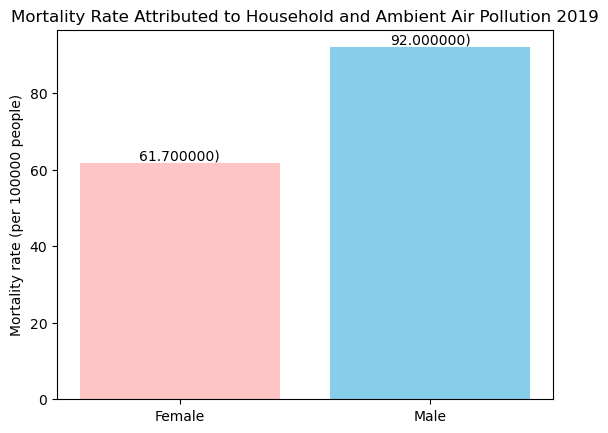

In [51]:
mortality_pollution = ['Mortality rate attributed to household and ambient air pollution, age-standardized, female (per 100,000 female population)', 
                       'Mortality rate attributed to household and ambient air pollution, age-standardized, male (per 100,000 male population)']

filtered_health_column = df[df['Health and Mortality'].isin(mortality_pollution)]

xtick_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(filtered_health_column['Health and Mortality'], filtered_health_column['Value'], color = colour)
plt.ylabel('Mortality rate (per 100000 people)')
plt.title('Mortality Rate Attributed to Household and Ambient Air Pollution 2019')
plt.xticks(ticks = range(len(xtick_name)), labels = xtick_name)


# Adding data labels
for i, (value, label) in enumerate(zip(filtered_health_column['Value'], xtick_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'bottom')

plt.show()

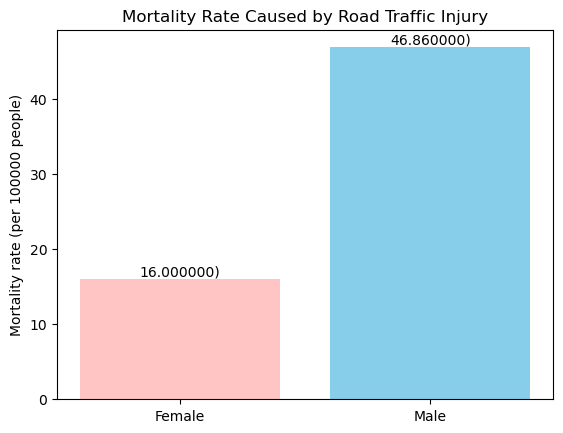

In [52]:
mortality_road_traffic = ['Mortality caused by road traffic injury, female (per 100,000 female population)', 
                          'Mortality caused by road traffic injury, male (per 100,000 male population)']

filtered_health_column = df[df['Health and Mortality'].isin(mortality_road_traffic)]

# Calculate average values for each category
average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xtick_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.ylabel('Mortality rate (per 100000 people)')
plt.title('Mortality Rate Caused by Road Traffic Injury')
plt.xticks(ticks = range(len(xtick_name)), labels = xtick_name)

# Adding data labels
for i, (value, label) in enumerate(zip(average_values['Value'], xtick_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'bottom')

plt.show()

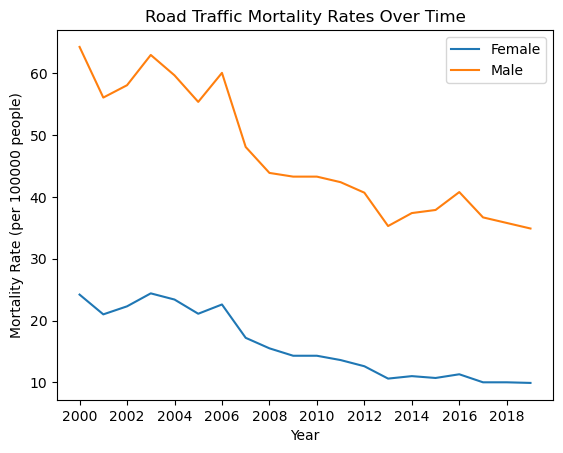

In [67]:
mortality_road_traffic = df.loc[df['Health and Mortality'].isin(['Mortality caused by road traffic injury, female (per 100,000 female population)',
                         'Mortality caused by road traffic injury, male (per 100,000 male population)'])]

pivot_data = mortality_road_traffic.pivot(index = 'Year', columns = 'Health and Mortality', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Mortality caused by road traffic injury, female (per 100,000 female population)'], label = 'Female')
plt.plot(pivot_data.index, pivot_data['Mortality caused by road traffic injury, male (per 100,000 male population)'], label = 'Male')
plt.title('Road Traffic Mortality Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 100000 people)')
plt.xticks(range(min(pivot_data.index), max(pivot_data.index) +1, 2))
plt.legend()
plt.show()
                                    
                                    

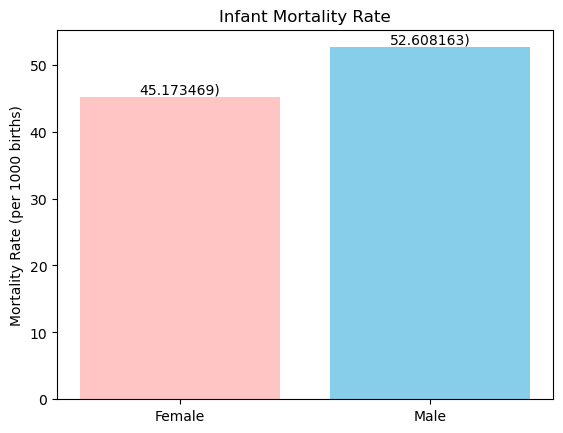

In [53]:
mortality_infants = ['Mortality rate, infant, female (per 1,000 live births)',
                    'Mortality rate, infant, male (per 1,000 live births)']

filtered_health_column = df[df['Health and Mortality'].isin(mortality_infants)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xtick_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Infant Mortality Rate')
plt.ylabel('Mortality Rate (per 1000 births)')
plt.xticks(ticks = range(len(xtick_name)), labels = xtick_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xtick_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'bottom')

plt.show()

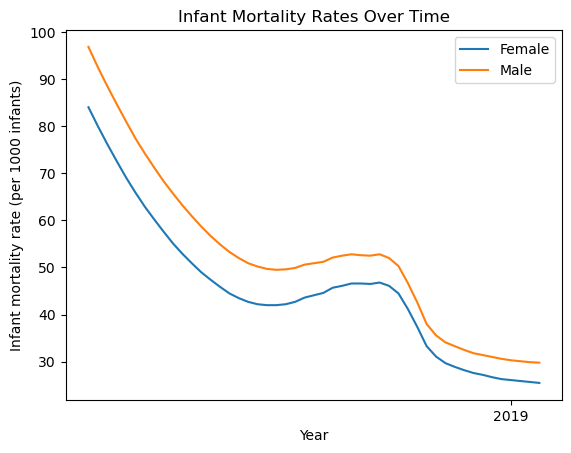

In [154]:
mortality_infants = df.loc[df['Health and Mortality'].isin( ['Mortality rate, infant, female (per 1,000 live births)',
                    'Mortality rate, infant, male (per 1,000 live births)'])]

pivot_table = mortality_infants.pivot(index = 'Year', columns = 'Health and Mortality', values = 'Value')

plt.plot(pivot_table.index, pivot_table['Mortality rate, infant, female (per 1,000 live births)'], label = 'Female')
plt.plot(pivot_table.index, pivot_table['Mortality rate, infant, male (per 1,000 live births)'], label = 'Male')
plt.title('Infant Mortality Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Infant mortality rate (per 1000 infants)')
plt.xticks(range(min(pivot_data.index), max(pivot_data.index) +1, 10))
plt.legend()
plt.show()

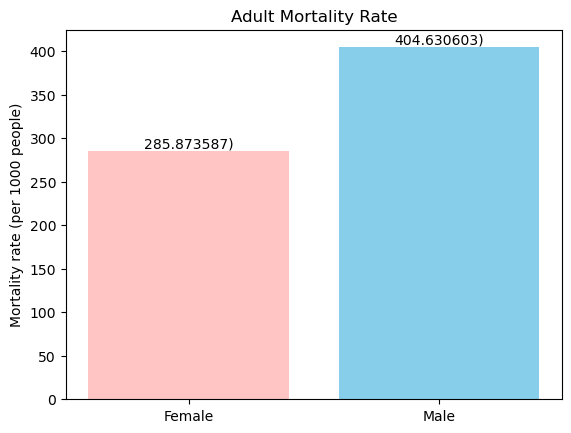

In [54]:
mortality_adults = ['Mortality rate, adult, female (per 1,000 female adults)',
                   'Mortality rate, adult, male (per 1,000 male adults)']

filtered_health_column = df[df['Health and Mortality'].isin(mortality_adults)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xtick_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Adult Mortality Rate')
plt.ylabel('Mortality rate (per 1000 people)')
plt.xticks(ticks = range(len(xtick_name)), labels = xtick_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xtick_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'bottom')

plt.show()

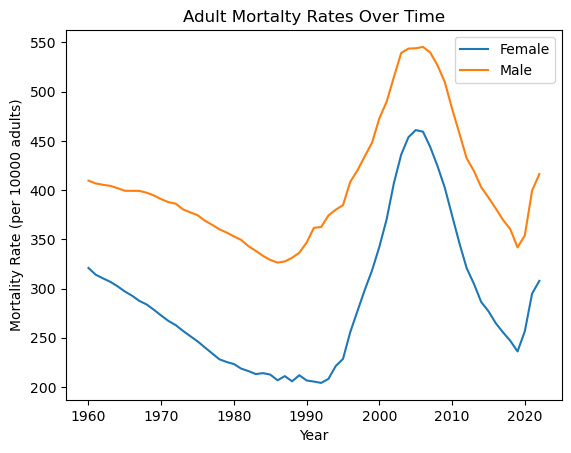

In [72]:
mortality_adults = df.loc[df['Health and Mortality'].isin(['Mortality rate, adult, female (per 1,000 female adults)', 
                'Mortality rate, adult, male (per 1,000 male adults)'])]

pivot_data = mortality_adults.pivot(index = 'Year', columns = 'Health and Mortality', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Mortality rate, adult, female (per 1,000 female adults)'], label = 'Female')
plt.plot(pivot_data.index, pivot_data['Mortality rate, adult, male (per 1,000 male adults)'], label = 'Male')
plt.title('Adult Mortalty Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Mortality Rate (per 10000 adults)')
plt.legend()
plt.show()

Causes of death by communicable diseases

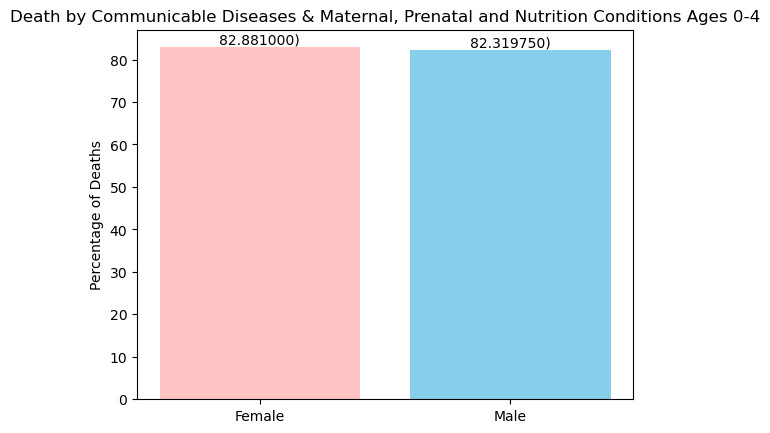

In [55]:
zero_to_4 = ['Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4, female (% of female population ages 0-4)',
         'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4, male (% of male population ages 0-4)']

filtered_health_column = df[df['Health and Mortality'].isin(zero_to_4)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Death by Communicable Diseases & Maternal, Prenatal and Nutrition Conditions Ages 0-4')
plt.ylabel('Percentage of Deaths')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)


for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'bottom')

plt.show()

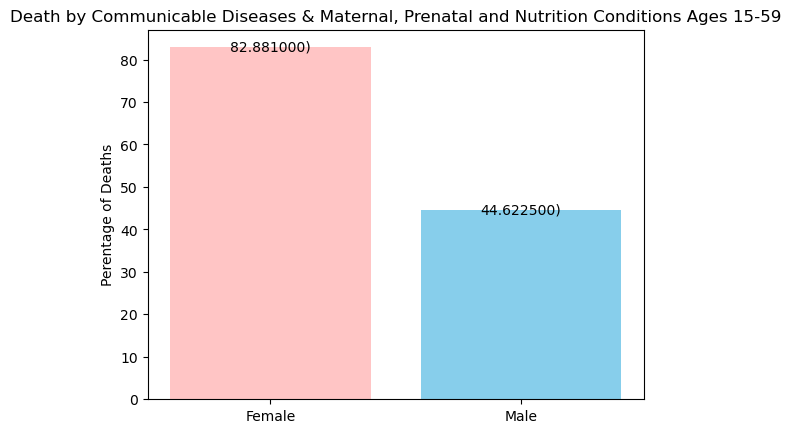

In [56]:
five_to_59 = ['Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 0-4, female (% of female population ages 0-4)',
             'Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions, ages 15-59, male (% of male population ages 15-59)']

filtered_health_column = df[df['Health and Mortality'].isin(five_to_59)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Death by Communicable Diseases & Maternal, Prenatal and Nutrition Conditions Ages 15-59')
plt.ylabel('Perentage of Deaths')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')

plt.show()

Cause of death by non communicable diseases

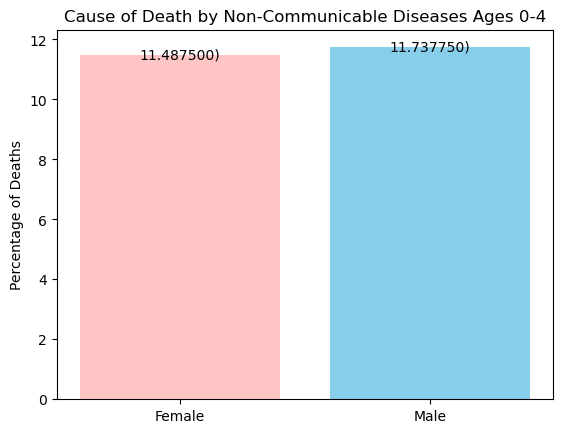

In [57]:
zero_to_four = ['Cause of death, by non-communicable diseases, ages 0-4, female (% of female population ages 0-4)',
               'Cause of death, by non-communicable diseases, ages 0-4, male (% of male population ages 0-4)']

filtered_health_column = df[df['Health and Mortality'].isin(zero_to_four)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Cause of Death by Non-Communicable Diseases Ages 0-4')
plt.ylabel('Percentage of Deaths')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

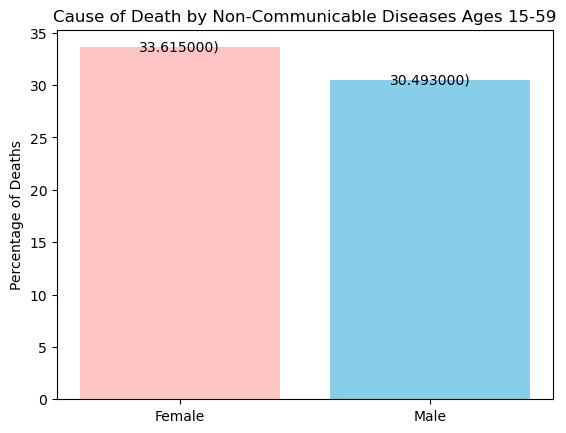

In [58]:
fifteen_to_59 = ['Cause of death, by non-communicable diseases, ages 15-59, female (% of female population ages 15-59)',
            'Cause of death, by non-communicable diseases, ages 15-59, male (% of male population ages 15-59)']

filtered_health_column = df[df['Health and Mortality'].isin(fifteen_to_59)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Cause of Death by Non-Communicable Diseases Ages 15-59')
plt.ylabel('Percentage of Deaths')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

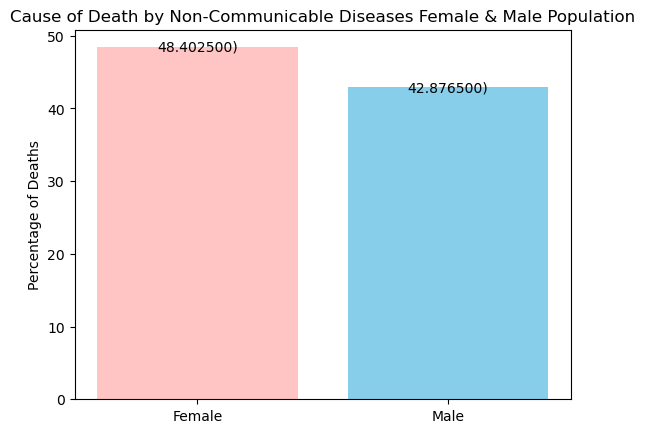

In [59]:
all_males_females = ['Cause of death, by non-communicable diseases, female (% of female population)',
                    'Cause of death, by non-communicable diseases, male (% of male population)']

filtered_health_column = df[df['Health and Mortality'].isin(all_males_females)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Cause of Death by Non-Communicable Diseases Female & Male Population')
plt.ylabel('Percentage of Deaths')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

Cause of death by injury

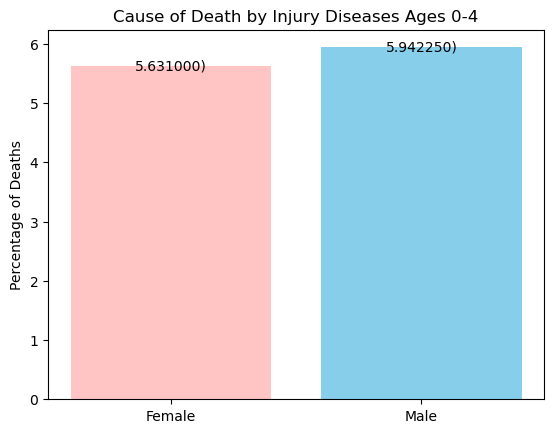

In [60]:
zero_to_4 = ['Cause of death, by injury, ages 0-4, female (% of female population ages 0-4)',
            'Cause of death, by injury, ages 0-4, male (% of male population ages 0-4)']

filtered_health_column = df[df['Health and Mortality'].isin(zero_to_4)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Cause of Death by Injury Diseases Ages 0-4')
plt.ylabel('Percentage of Deaths')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

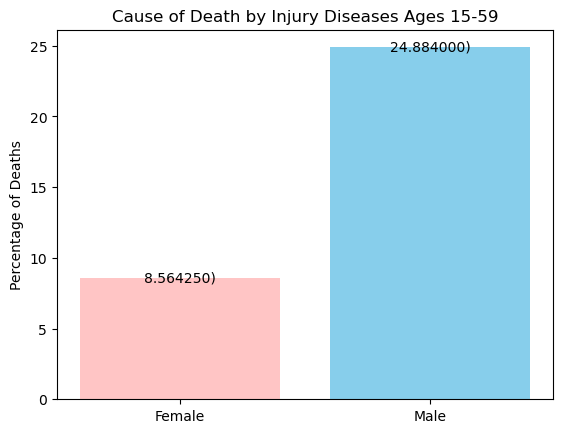

In [61]:
fifteen_to_59 = ['Cause of death, by injury, ages 15-59, female (% of female population ages 15-59)',
                'Cause of death, by injury, ages 15-59, male (% of male population ages 15-59)']

filtered_health_column = df[df['Health and Mortality'].isin(fifteen_to_59)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Cause of Death by Injury Diseases Ages 15-59')
plt.ylabel('Percentage of Deaths')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

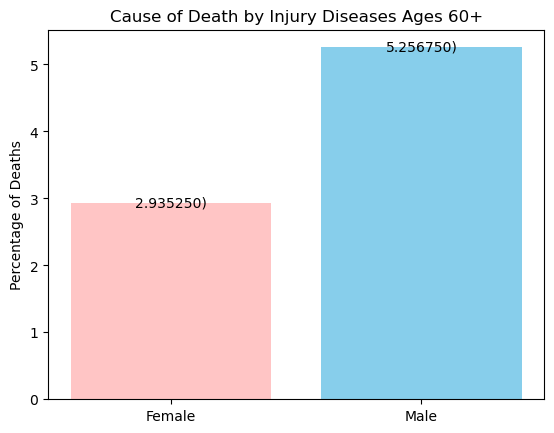

In [62]:
sixty_plus = ['Cause of death, by injury, ages 60+, female (% of female population ages 60+)',
             'Cause of death, by injury, ages 60+, male (% of male population ages 60+)']

filtered_health_column = df[df['Health and Mortality'].isin(sixty_plus)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Cause of Death by Injury Diseases Ages 60+')
plt.ylabel('Percentage of Deaths')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

Health Prevalence Indicators

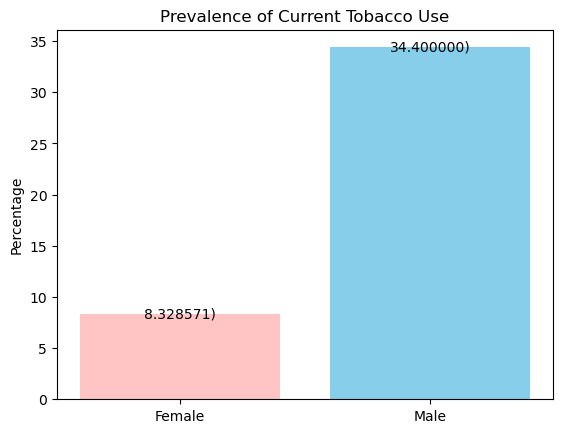

In [63]:
tobacco = ['Prevalence of current tobacco use, females (% of female adults)',
          'Prevalence of current tobacco use, males (% of male adults)']

filtered_health_column = df[df['Health and Mortality'].isin(tobacco)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Prevalence of Current Tobacco Use')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

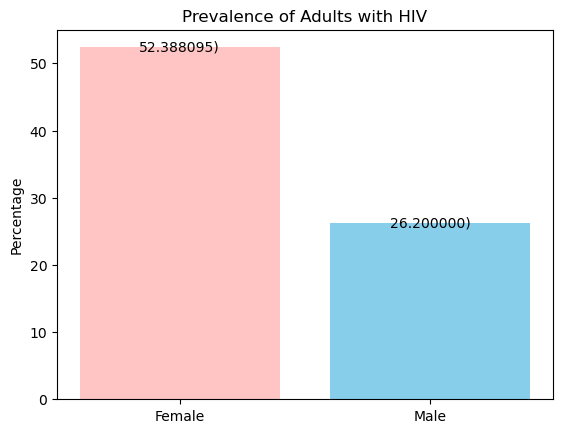

In [64]:
hiv = ['Prevalence of overweight, female (% of female adults)',
      'Prevalence of overweight, male (% of male adults)']

filtered_health_column = df[df['Health and Mortality'].isin(hiv)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Prevalence of Adults with HIV')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

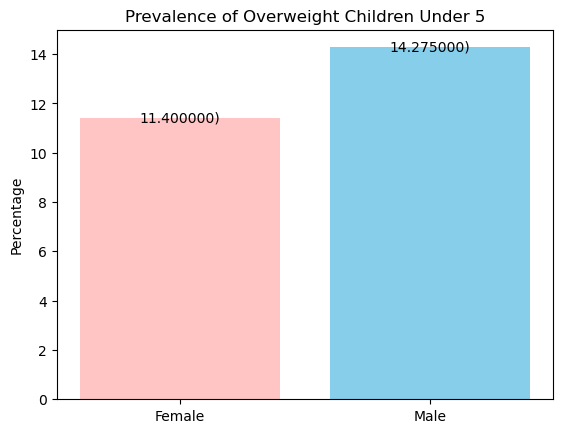

In [65]:
overweight_children = ['Prevalence of overweight, weight for height, female (% of children under 5)',
             'Prevalence of overweight, weight for height, male (% of children under 5)']

filtered_health_column = df[df['Health and Mortality'].isin(overweight_children)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Prevalence of Overweight Children Under 5')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

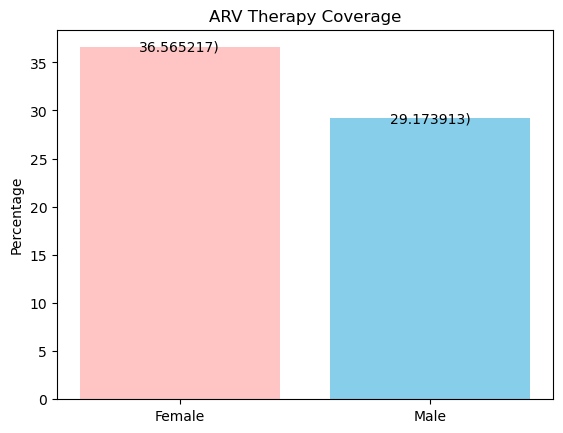

In [66]:
arv = ['Antiretroviral therapy coverage (% of adult females living with HIV)',
      'Antiretroviral therapy coverage (% of adult males living with HIV)']

filtered_health_column = df[df['Health and Mortality'].isin(arv)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('ARV Therapy Coverage')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

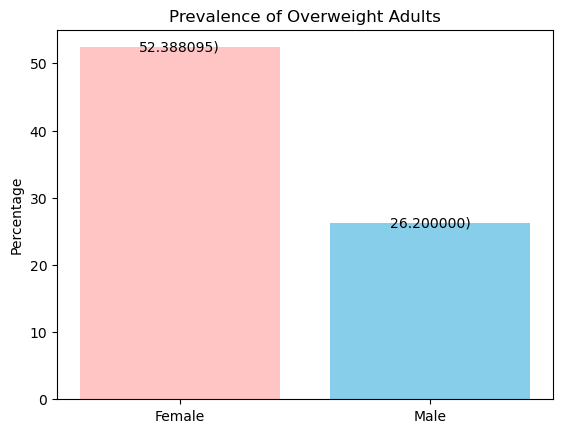

In [50]:
overweight_adults = ['Prevalence of overweight, female (% of female adults)',
                    'Prevalence of overweight, male (% of male adults)']

filtered_health_column = df[df['Health and Mortality'].isin(overweight_adults)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Prevalence of Overweight Adults')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

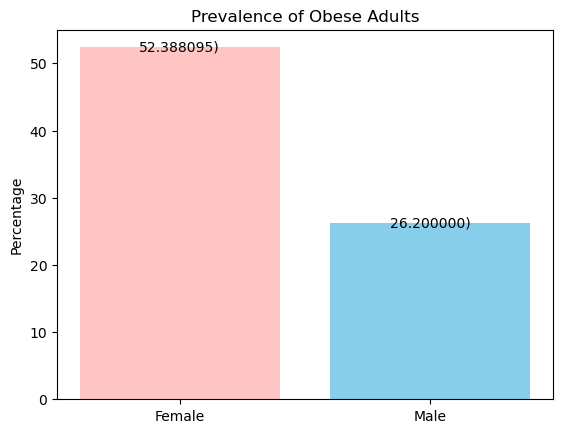

In [46]:
obese = ['Prevalence of overweight, female (% of female adults)',
                    'Prevalence of overweight, male (% of male adults)']

filtered_health_column = df[df['Health and Mortality'].isin(obese)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Prevalence of Obese Adults')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

Life Expectancy

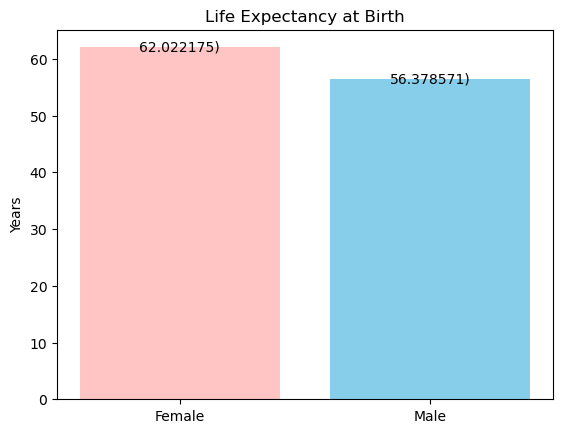

In [49]:
life_expect_birth = ['Life expectancy at birth, male (years)',
                    'Life expectancy at birth, female (years)']

filtered_health_column = df[df['Health and Mortality'].isin(life_expect_birth)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Life Expectancy at Birth')
plt.ylabel('Years')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

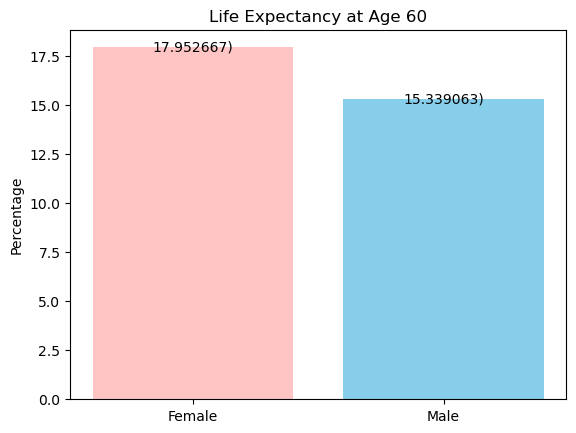

In [48]:
life_expect_60 = ['Life expectancy at age 60, female',
                 'Life expectancy at age 60, male']

filtered_health_column = df[df['Health and Mortality'].isin(life_expect_60)]

average_values = filtered_health_column.groupby('Health and Mortality')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

color=['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Health and Mortality'], average_values['Value'], color = colour)
plt.title('Life Expectancy at Age 60')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name )

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

LABOUR AND EMPLOYMENT

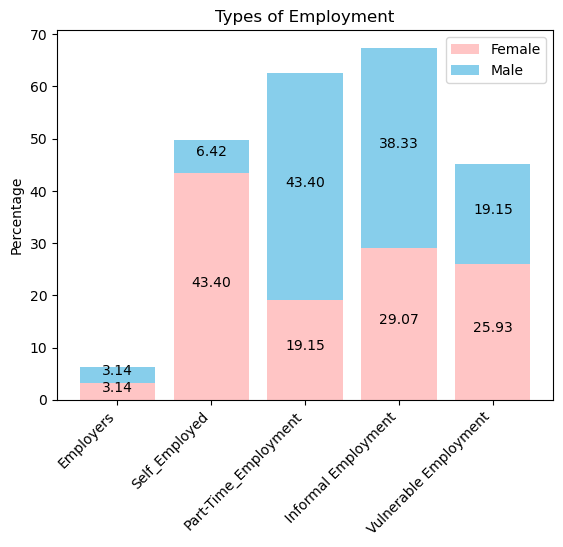

In [87]:
employment_type = ['Employers, female (% of female employment) (modeled ILO estimate)',
                  'Employers, male (% of male employment) (modeled ILO estimate)',
                  'Self-employed, female (% of female employment) (modeled ILO estimate)',
                  'Self-employed, male (% of male employment) (modeled ILO estimate)',
                  'Part time employment, female (% of total female employment)',
                  'Part time employment, male (% of total male employment)',
                  'Informal employment, female (% of total non-agricultural employment)',
                  'Informal employment, male (% of total non-agricultural employment)',
                  'Vulnerable employment, female (% of female employment) (modeled ILO estimate)',
                  'Vulnerable employment, male (% of male employment) (modeled ILO estimate)']

filtered_labour_column = df[df['Labour and Employment'].isin(employment_type)]

female_values = filtered_labour_column[filtered_labour_column['Labour and Employment'].str.contains('female')].groupby('Labour and Employment')['Value'].mean().reset_index()

male_values = filtered_labour_column[filtered_labour_column['Labour and Employment'].str.contains('male')].groupby('Labour and Employment')['Value'].mean().reset_index()

# Ensure female and male values have the same index
common_index = female_values.index.intersection(male_values.index)
female_values = female_values.loc[common_index]
male_values = male_values.loc[common_index]


xticks_name = ['Employers', 'Self_Employed', 'Part-Time_Employment', ' Informal Employment', 'Vulnerable Employment']

plt.bar(female_values.index, female_values['Value'], label='Female', color = '#FFC5C5')
plt.bar(male_values.index, male_values['Value'], bottom=female_values['Value'], label='Male', color = '#87CEEB')
plt.title('Types of Employment')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')
plt.legend()

for i, (female_value, male_value) in enumerate(zip(female_values['Value'], male_values['Value'])):
    plt.text(i, female_value/2, f"{female_value:.2f}", ha='center')
    plt.text(i, female_value + male_value/2, f"{male_value:.2f}", ha='center')


plt.show()


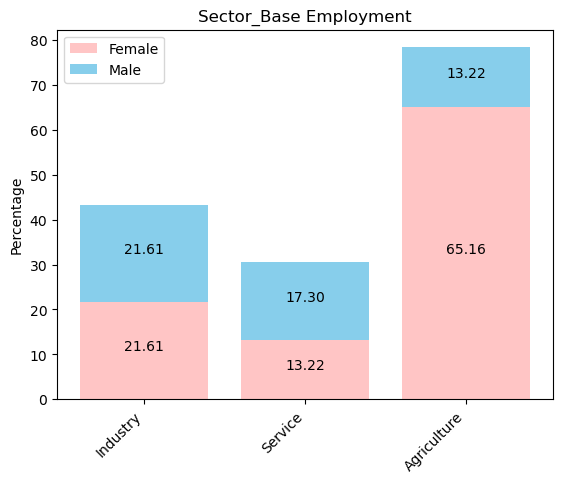

In [83]:
sector_employment = ['Employment in industry, female (% of female employment) (modeled ILO estimate)',
                    'Employment in industry, male (% of male employment) (modeled ILO estimate)',
                    'Employment in services, female (% of female employment) (modeled ILO estimate)',
                    'Employment in services, male (% of male employment) (modeled ILO estimate)',
                    'Employment in agriculture, female (% of female employment) (modeled ILO estimate)',
                    'Employment in agriculture, male (% of male employment) (modeled ILO estimate)']

filtered_labour_column = df[df['Labour and Employment'].isin(sector_employment)]

female_values = filtered_labour_column[filtered_labour_column['Labour and Employment'].str.contains('female')].groupby('Labour and Employment')['Value'].mean().reset_index()
male_values = filtered_labour_column[filtered_labour_column['Labour and Employment'].str.contains('male')].groupby('Labour and Employment')['Value'].mean().reset_index()

common_index = female_values.index.intersection(male_values.index)
female_values = female_values.loc[common_index]
male_values = male_values.loc[common_index]

xticks_name = ['Industry', 'Service', 'Agriculture']

plt.bar(female_values.index, female_values['Value'], label='Female', color = '#FFC5C5')
plt.bar(male_values.index, male_values['Value'], bottom=female_values['Value'], label='Male', color = '#87CEEB')
plt.title('Sector_Base Employment')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')
plt.legend()

for i, (female_value, male_value) in enumerate(zip(female_values['Value'], male_values['Value'])):
    plt.text(i, female_value/2, f"{female_value:.2f}", ha='center')
    plt.text(i, female_value + male_value/2, f"{male_value:.2f}", ha='center')

    
plt.show()


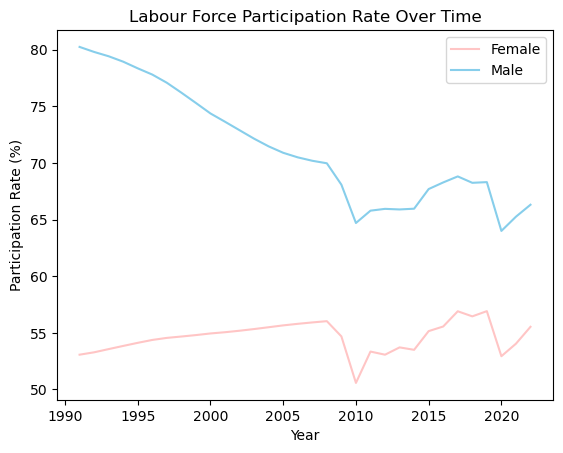

In [91]:
labour_force = df.loc[df['Labour and Employment'].isin(['Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)',
                                                       'Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)'])]

pivot_data = labour_force.pivot(index = 'Year', columns = 'Labour and Employment', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Labor force participation rate, female (% of female population ages 15-64) (modeled ILO estimate)'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Labor force participation rate, male (% of male population ages 15-64) (modeled ILO estimate)'], label = 'Male', color = '#87CEEB')
plt.title('Labour Force Participation Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Participation Rate (%)')
plt.legend()
plt.show()

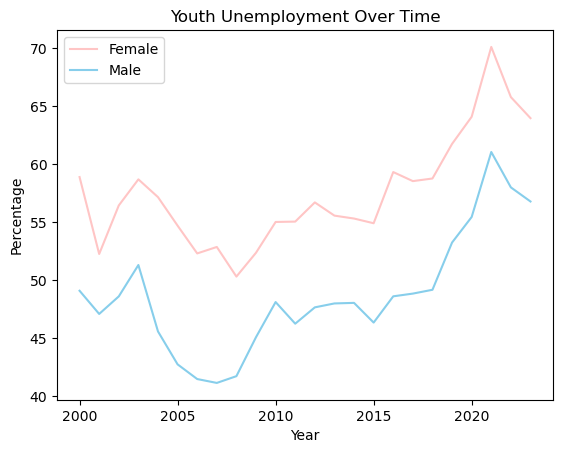

In [113]:
youth_unemployment = df.loc[df['Labour and Employment'].isin(['Unemployment, youth female (% of female labor force ages 15-24) (national estimate)',
                                                             'Unemployment, youth male (% of male labor force ages 15-24) (national estimate)'])]

pivot_data = youth_unemployment.pivot(index = 'Year', columns = 'Labour and Employment', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Unemployment, youth female (% of female labor force ages 15-24) (national estimate)'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Unemployment, youth male (% of male labor force ages 15-24) (national estimate)'], label = 'Male',  color ='#87CEEB')
plt.title('Youth Unemployment Over Time')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend()
plt.show()

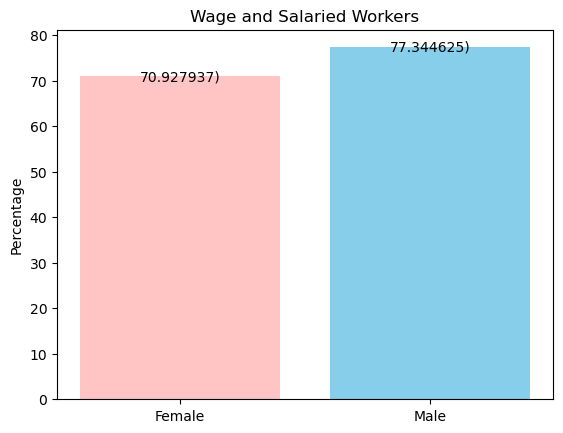

In [116]:
wages = ['Wage and salaried workers, female (% of female employment) (modeled ILO estimate)',
        'Wage and salaried workers, male (% of male employment) (modeled ILO estimate)']

filtered_labour_column = df[df['Labour and Employment'].isin(wages)]

average_values = filtered_labour_column.groupby('Labour and Employment')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Labour and Employment'], average_values['Value'], color = colour)
plt.title('Wage and Salaried Workers')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

Education

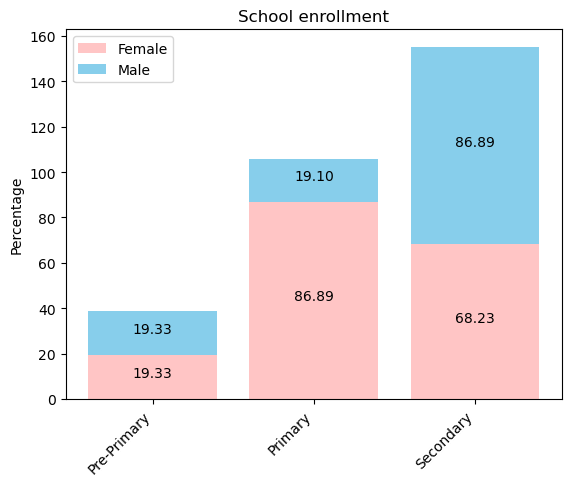

In [18]:
school_enrollment = ['School enrollment, preprimary, female (% gross)',
                    'School enrollment, preprimary, male (% gross)',
                    'School enrollment, primary, female (% net)',
                    'School enrollment, primary, male (% net)',
                    'School enrollment, secondary, female (% net)',
                    'School enrollment, secondary, male (% net)']

filtered_education_column = df[df['Education'].isin(school_enrollment)]

female_values = filtered_education_column[filtered_education_column['Education'].str.contains('female')].groupby('Education')['Value'].mean().reset_index()
male_values = filtered_education_column[filtered_education_column['Education'].str.contains('male')].groupby('Education')['Value'].mean().reset_index()

common_index = female_values.index.intersection(male_values.index)
female_values = female_values.loc[common_index]
male_values = male_values.loc[common_index]

xticks_name = ['Pre-Primary', 'Primary', 'Secondary']

plt.bar(female_values.index, female_values['Value'], label='Female', color = '#FFC5C5')
plt.bar(male_values.index, male_values['Value'], bottom=female_values['Value'], label='Male', color = '#87CEEB')
plt.title('School enrollment')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')
plt.legend()

for i, (female_value, male_value) in enumerate(zip(female_values['Value'], male_values['Value'])):
    plt.text(i, female_value/2, f"{female_value:.2f}", ha='center')
    plt.text(i, female_value + male_value/2, f"{male_value:.2f}", ha='center')

    
plt.show()

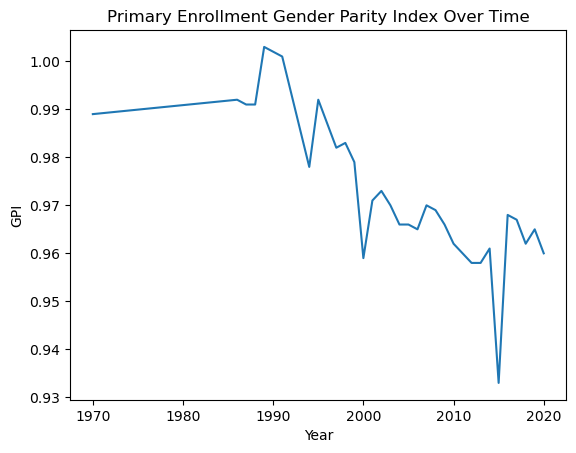

In [25]:
primary_enrollment = df.loc[df['Education'] == 'School enrollment, primary (gross), gender parity index (GPI)']

pivot_data = primary_enrollment.pivot(index = 'Year', columns = 'Education', values = 'Value')

plt.plot(pivot_data.index, pivot_data['School enrollment, primary (gross), gender parity index (GPI)'])
plt.title('Primary Enrollment Gender Parity Index Over Time')
plt.ylabel('GPI')
plt.xlabel('Year')
plt.show()

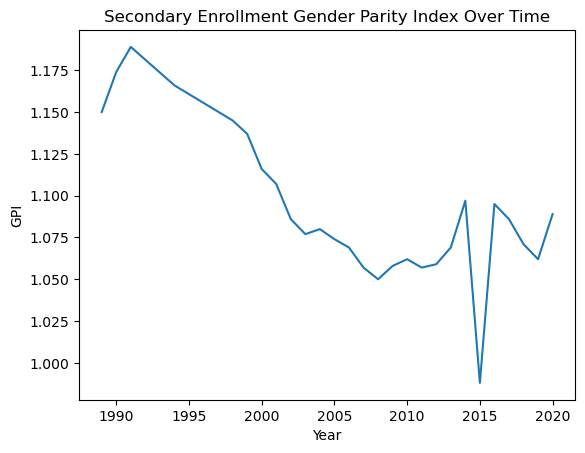

In [26]:
secondary_enrollment = df.loc[df['Education'] == 'School enrollment, secondary (gross), gender parity index (GPI)']

pivot_data = secondary_enrollment.pivot(index = 'Year', columns = 'Education', values = 'Value')

plt.plot(pivot_data.index, pivot_data['School enrollment, secondary (gross), gender parity index (GPI)'])
plt.title('Secondary Enrollment Gender Parity Index Over Time')
plt.ylabel('GPI')
plt.xlabel('Year')
plt.show()

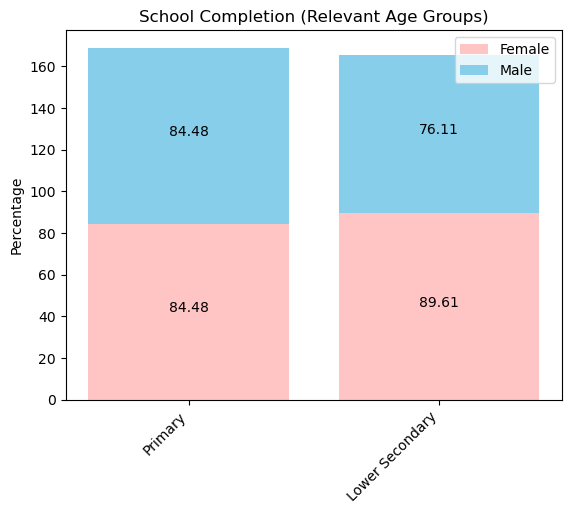

In [31]:
school_completion = ['Lower secondary completion rate, female (% of relevant age group)',
                    'Lower secondary completion rate, male (% of relevant age group)',
                    'Primary completion rate, female (% of relevant age group)',
                    'Primary completion rate, male (% of relevant age group)']

filtered_education_column = df[df['Education'].isin(school_completion)]

female_values = filtered_education_column[filtered_education_column['Education'].str.contains('female')].groupby('Education')['Value'].mean().reset_index()
male_values = filtered_education_column[filtered_education_column['Education'].str.contains('male')].groupby('Education')['Value'].mean().reset_index()

common_index = female_values.index.intersection(male_values.index)
female_values = female_values.loc[common_index]
male_values = male_values.loc[common_index]

xticks_name = ['Primary', 'Lower Secondary']

plt.bar(female_values.index, female_values['Value'], label='Female', color = '#FFC5C5')
plt.bar(male_values.index, male_values['Value'], bottom=female_values['Value'], label='Male', color = '#87CEEB')
plt.title('School Completion (Relevant Age Groups)')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')
plt.legend()

for i, (female_value, male_value) in enumerate(zip(female_values['Value'], male_values['Value'])):
    plt.text(i, female_value/2, f"{female_value:.2f}", ha='center')
    plt.text(i, female_value + male_value/2, f"{male_value:.2f}", ha='center')

    
plt.show()

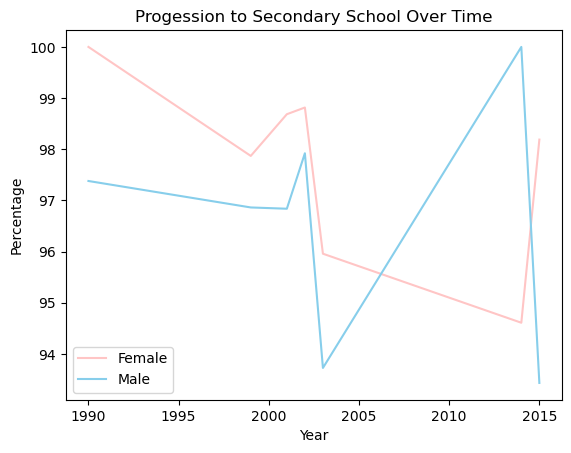

In [35]:
progression_secondary = df.loc[df['Education'].isin(['Progression to secondary school, female (%)',
                                                    'Progression to secondary school, male (%)'])]

pivot_data = progression_secondary.pivot(index = 'Year', columns = 'Education', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Progression to secondary school, female (%)'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Progression to secondary school, male (%)'], label = 'Male',  color ='#87CEEB')
plt.title('Progession to Secondary School Over Time')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend()
plt.show()

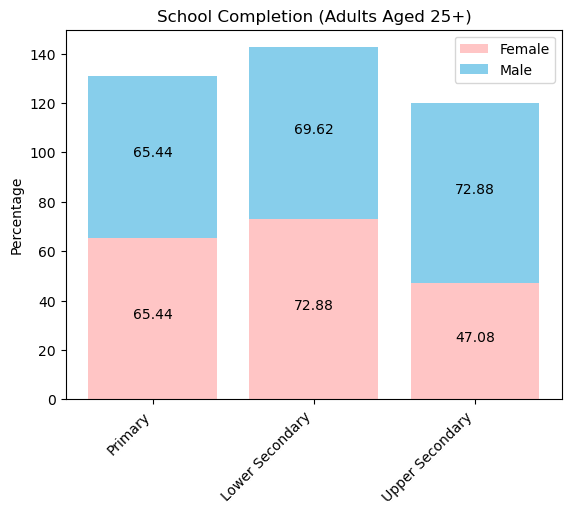

In [44]:
edu_attainment = ['Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)',
                 'Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)',
                 'Educational attainment, at least completed lower secondary, population 25+, female (%) (cumulative)',
                 'Educational attainment, at least completed lower secondary, population 25+, male (%) (cumulative)',
                 'Educational attainment, at least completed upper secondary, population 25+, female (%) (cumulative)',
                 'Educational attainment, at least completed upper secondary, population 25+, male (%) (cumulative)']

filtered_education_column = df[df['Education'].isin(edu_attainment)]

female_values = filtered_education_column[filtered_education_column['Education'].str.contains('female')].groupby('Education')['Value'].mean().reset_index()
male_values = filtered_education_column[filtered_education_column['Education'].str.contains('male')].groupby('Education')['Value'].mean().reset_index()

common_index = female_values.index.intersection(male_values.index)
female_values = female_values.loc[common_index]
male_values = male_values.loc[common_index]

xticks_name = ['Primary', 'Lower Secondary', 'Upper Secondary']

plt.bar(female_values.index, female_values['Value'], label='Female', color = '#FFC5C5')
plt.bar(male_values.index, male_values['Value'], bottom=female_values['Value'], label='Male', color = '#87CEEB')
plt.title('School Completion (Adults Aged 25+)')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')
plt.legend()

for i, (female_value, male_value) in enumerate(zip(female_values['Value'], male_values['Value'])):
    plt.text(i, female_value/2, f"{female_value:.2f}", ha='center')
    plt.text(i, female_value + male_value/2, f"{male_value:.2f}", ha='center')

    
plt.show()

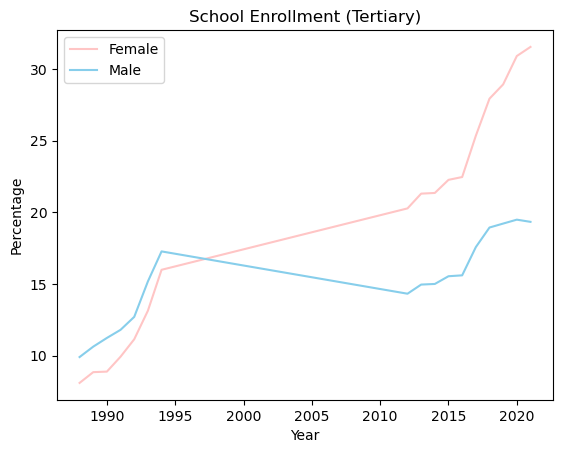

In [47]:
enrollment_tertiary = df.loc[df['Education'].isin(['School enrollment, tertiary, female (% gross)',
                                                  'School enrollment, tertiary, male (% gross)'])]

pivot_data = enrollment_tertiary.pivot(index = 'Year', columns = 'Education', values = 'Value')

plt.plot(pivot_data.index, pivot_data['School enrollment, tertiary, female (% gross)'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['School enrollment, tertiary, male (% gross)'], label = 'Male',  color ='#87CEEB')
plt.title('School Enrollment (Tertiary)')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend()
plt.show()

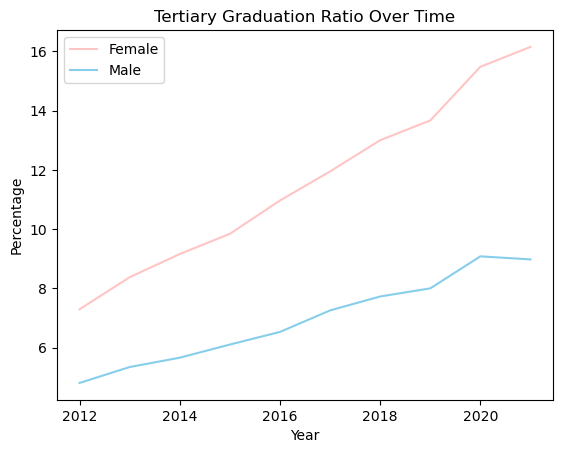

In [52]:
graduation_tertiary = df.loc[df['Education'].isin(['Gross graduation ratio, tertiary, female (%)',
                                                  'Gross graduation ratio, tertiary, male (%)'])]

pivot_data = graduation_tertiary.pivot(index = 'Year', columns = 'Education', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Gross graduation ratio, tertiary, female (%)'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Gross graduation ratio, tertiary, male (%)'], label = 'Male',  color ='#87CEEB')
plt.title('Tertiary Graduation Ratio Over Time')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend()
plt.show()

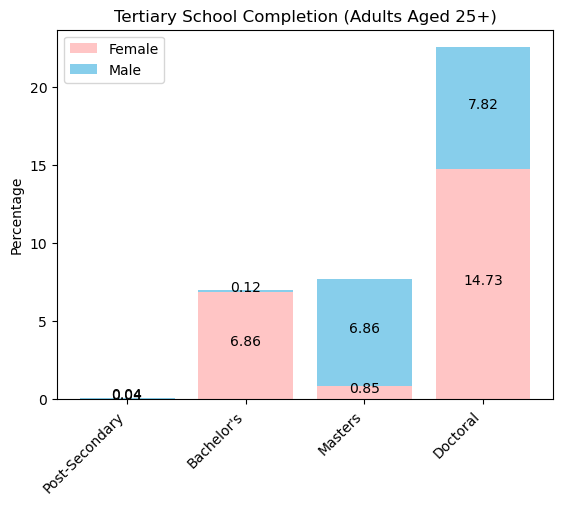

In [84]:
edu_tertiary = ['Educational attainment, at least completed post-secondary, population 25+, female (%) (cumulative)',
               'Educational attainment, at least completed post-secondary, population 25+, male (%) (cumulative)',
               "Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)",
               "Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)",
               "Educational attainment, at least Master's or equivalent, population 25+, female (%) (cumulative)",
               "Educational attainment, at least Master's or equivalent, population 25+, male (%) (cumulative)",
               'Educational attainment, Doctoral or equivalent, population 25+, female (%) (cumulative)',
               'Educational attainment, Doctoral or equivalent, population 25+, male (%) (cumulative)']
              

filtered_education_column = df[df['Education'].isin(edu_tertiary)]

female_values = filtered_education_column[filtered_education_column['Education'].str.contains('female')].groupby('Education')['Value'].mean().reset_index()
male_values = filtered_education_column[filtered_education_column['Education'].str.contains('male')].groupby('Education')['Value'].mean().reset_index()

common_index = female_values.index.intersection(male_values.index)
female_values = female_values.loc[common_index]
male_values = male_values.loc[common_index]

xticks_name = ['Post-Secondary', "Bachelor's", "Masters", "Doctoral"]

plt.bar(female_values.index, female_values['Value'], label='Female', color = '#FFC5C5')
plt.bar(male_values.index, male_values['Value'], bottom=female_values['Value'], label='Male', color = '#87CEEB')
plt.title('Tertiary School Completion (Adults Aged 25+)')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')
plt.legend()

for i, (female_value, male_value) in enumerate(zip(female_values['Value'], male_values['Value'])):
    plt.text(i, female_value/2, f"{female_value:.2f}", ha='center')
    plt.text(i, female_value + male_value/2, f"{male_value:.2f}", ha='center')

    
plt.show()


In [79]:
print(df['Value'].dtypes)

float64


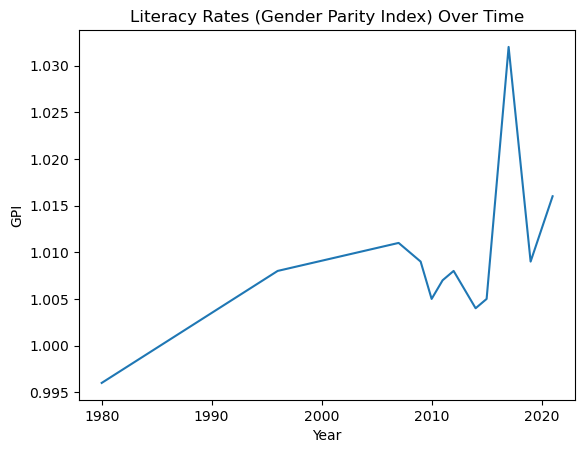

In [85]:
literacy_gpi = df.loc[df['Education'] == 'Literacy rate, youth (ages 15-24), gender parity index (GPI)']

pivot_data = literacy_gpi.pivot(index = 'Year', columns = 'Education', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Literacy rate, youth (ages 15-24), gender parity index (GPI)'])
plt.title('Literacy Rates (Gender Parity Index) Over Time')
plt.ylabel('GPI')
plt.xlabel('Year')
plt.show()

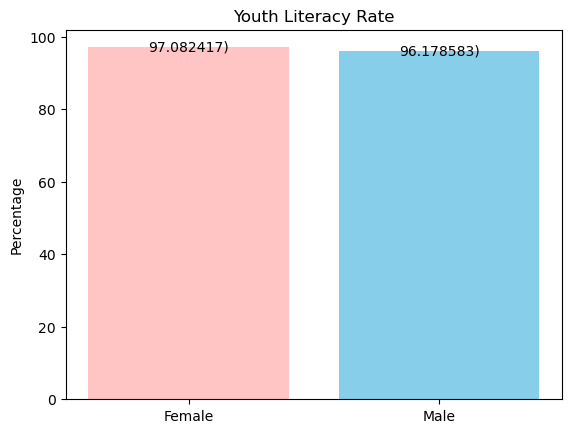

In [91]:
literacy_youth = ['Literacy rate, youth female (% of females ages 15-24)',
                 'Literacy rate, youth male (% of males ages 15-24)']

filtered_education_column = df[df['Education'].isin(literacy_youth)]

average_values = filtered_education_column.groupby('Education')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Education'], average_values['Value'], color = colour)
plt.title('Youth Literacy Rate')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

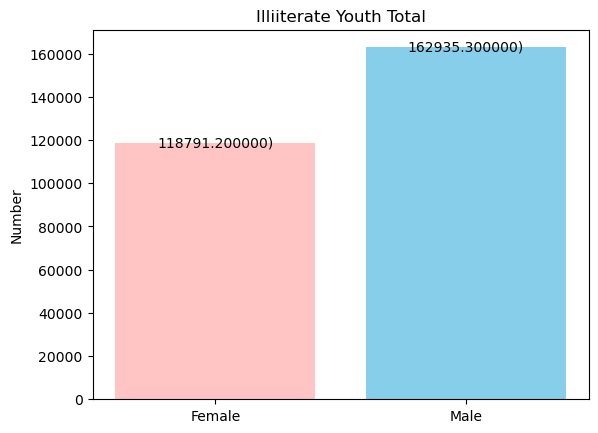

In [97]:
illiterate_youth = ['Youth illiterate population, 15-24 years, female (number)',
                   'Youth illiterate population, 15-24 years, male (number)']

filtered_education_column = df[df['Education'].isin(illiterate_youth)]

average_values = filtered_education_column.groupby('Education')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']



plt.bar(average_values['Education'], average_values['Value'], color = colour)
plt.title('Illiiterate Youth Total')
plt.ylabel('Number')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

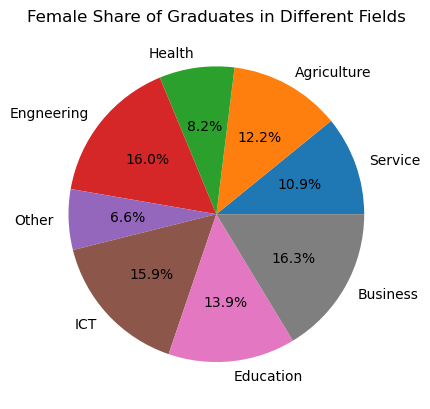

In [26]:
stem_graduates = [
'Female share of graduates in services (%, tertiary)',
'Female share of graduates in Agriculture, Forestry, Fisheries and Veterinary programmes (%, tertiary)',
'Female share of graduates in health and welfare (%, tertiary)',
'Female share of graduates in engineering, manufacturing and construction (%, tertiary)',
'Female share of graduates in other fields than Science, Technology, Engineering and Mathematics programmes, tertiary (%)',
'Female share of graduates in Information and Communication Technologies programmes, tertiary (%)',
'Female share of graduates in education (%, tertiary)',
'Female share of graduates in Business, Administration and Law programmes, tertiary (%)'
]

filtered_education_column = df[df['Education'].isin(stem_graduates)]

average_values = filtered_education_column.groupby('Education')['Value'].mean().reset_index()

labels = ['Service', 'Agriculture', 'Health', 'Engneering', 'Other', 'ICT', 'Education', 'Business']
sizes = average_values['Value']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Female Share of Graduates in Different Fields')
plt.show()

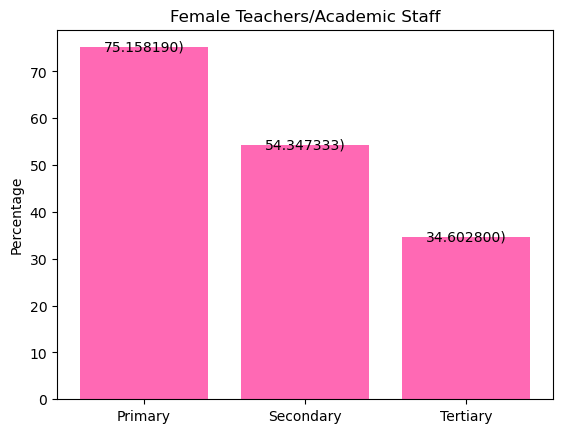

In [49]:
teachers = ['Primary education, teachers (% female)',
           'Secondary education, teachers (% female)',
           'Tertiary education, academic staff (% female)']

filtered_education_column = df[df['Education'].isin(teachers)]

average_values = filtered_education_column.groupby('Education')['Value'].mean().reset_index()

xticks_name = ['Primary', 'Secondary', 'Tertiary']

plt.bar(average_values['Education'], average_values['Value'], color = '#FF69B4')
plt.title('Female Teachers/Academic Staff')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

Women's Rights and empowerment

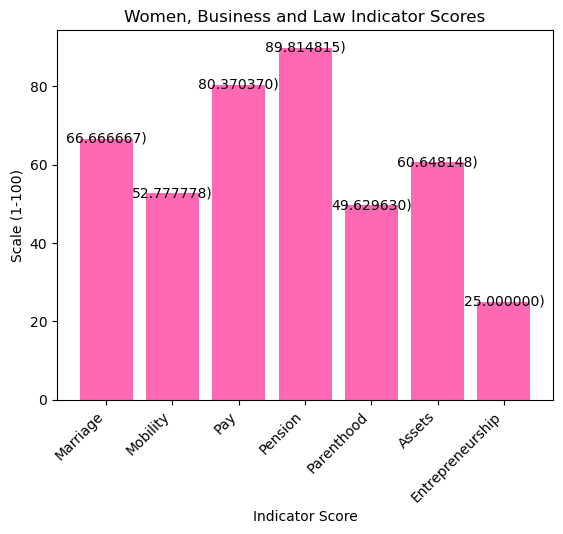

In [42]:
indicator_scores = ['Women, Business and the Law: Marriage Indicator Score (scale 1-100)',
                   'Women, Business and the Law: Mobility Indicator Score (scale 1-100)',
                   'Women, Business and the Law: Pay Indicator Score (scale 1-100)',
                   'Women, Business and the Law: Pension Indicator Score (scale 1-100)',
                   'Women, Business and the Law: Parenthood Indicator Score (scale 1-100)',
                   'Women, Business and the Law: Assets Indicator Score (scale 1-100)',
                   'Women, Business and the Law: Entrepreneurship Indicator Score (scale 1-100)']

filtered_women_column = df[df["Women's Rights and Empowerment"].isin(indicator_scores)]

average_values = filtered_women_column.groupby("Women's Rights and Empowerment")['Value'].mean().reset_index()

xticks_name = ['Marriage', 'Mobility', 'Pay', 'Pension', 'Parenthood', 'Assets', 'Entrepreneurship']

plt.bar(average_values["Women's Rights and Empowerment"], average_values['Value'], color = '#FF69B4')
plt.title('Women, Business and Law Indicator Scores')
plt.ylabel('Scale (1-100)')
plt.xlabel('Indicator Score')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

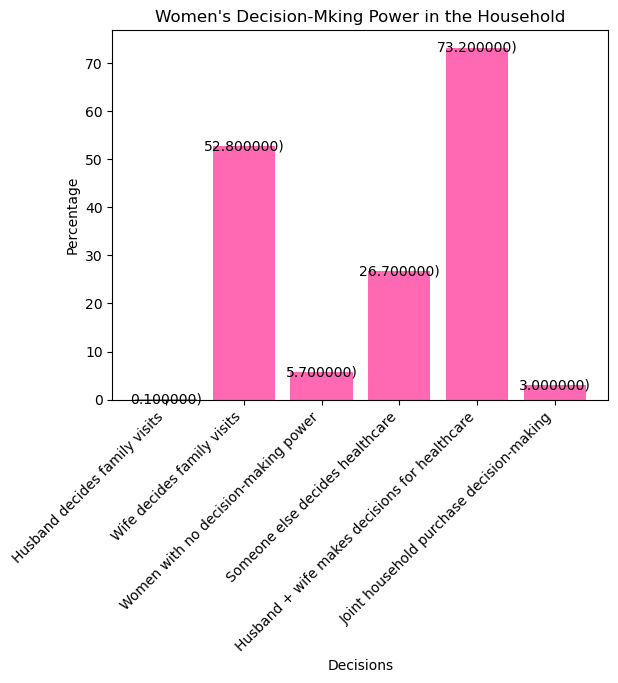

In [21]:
decision_making = [
                 "Decision maker about a woman's visits to her family or relatives: mainly husband (% of women age 15-49)",
                  "Decision maker about a woman's visits to her family or relatives: mainly wife (% of women age 15-49)",
                  "Women participating in none of the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)",
                  "Decision maker about a woman's own health care: someone else (% of women age 15-49)",
                  "Decision maker about a woman's own health care: wife and husband jointly (% of women age 15-49)",
                  "Decision maker about major household purchases: wife and husband jointly (% of women age 15-49)"]

filtered_women_column = df[df["Women's Rights and Empowerment"].isin(decision_making)]

average_values = filtered_women_column.groupby("Women's Rights and Empowerment")['Value'].mean().reset_index()

xticks_name = ['Husband decides family visits', 'Wife decides family visits', 'Women with no decision-making power', 'Someone else decides healthcare', 'Husband + wife makes decisions for healthcare', 'Joint household purchase decision-making']

plt.bar(average_values["Women's Rights and Empowerment"], average_values['Value'], color = '#FF69B4')
plt.title("Women's Decision-Mking Power in the Household")
plt.ylabel('Percentage')
plt.xlabel('Decisions')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

In [52]:
distinct_values = df[df["Women's Rights and Empowerment"].isin(decision_making)]["Women's Rights and Empowerment"].drop_duplicates().values
print(distinct_values)

["Decision maker about a woman's visits to her family or relatives: mainly husband (% of women age 15-49)"
 "Decision maker about a woman's visits to her family or relatives: mainly wife (% of women age 15-49)"
 "Decision maker about a woman's own health care: someone else (% of women age 15-49)"
 'Women participating in none of the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)'
 "Decision maker about a woman's own health care: wife and husband jointly (% of women age 15-49)"
 'Decision maker about major household purchases: wife and husband jointly (% of women age 15-49)']


In [51]:
count = df[df["Women's Rights and Empowerment"].isin(decision_making)]["Women's Rights and Empowerment"].nunique()
print(count)

6


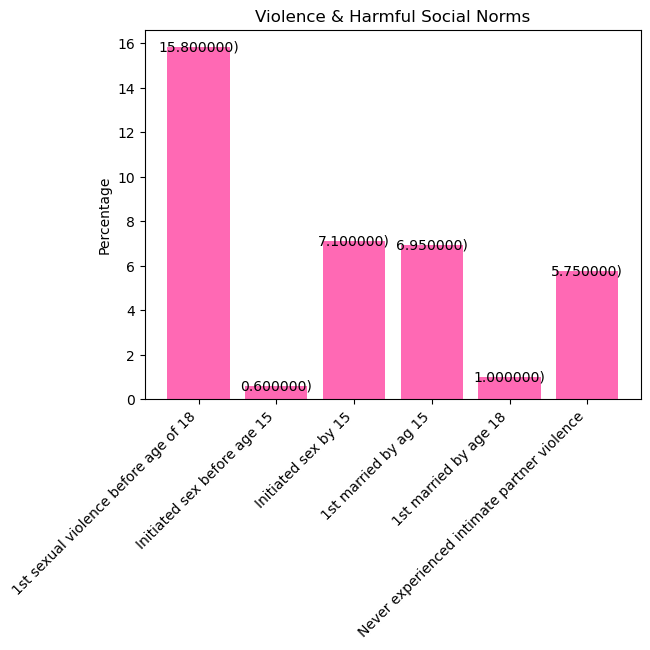

In [38]:
sexual_norms = ['Women who experienced first sexual violence before age 18 (% of women ages 15-49)',
               'Women who initiated sexual intercourse before age 15 (% of women ages 15-19)',
               'Women who initiated sexual intercourse by age 15 (% of women ages 20-24)',
               'Women who were first married by age 15 (% of women ages 20-24)',
               'Women who were first married by age 18 (% of women ages 20-24)',
               'Proportion of women who have ever experienced intimate partner violence (% of ever-partnered women ages 15-49)']

filtered_women_column = df[df["Women's Rights and Empowerment"].isin(sexual_norms)]

average_values = filtered_women_column.groupby("Women's Rights and Empowerment")['Value'].mean().reset_index()

xticks_name = ['1st sexual violence before age of 18','Initiated sex before age 15', 'Initiated sex by 15', '1st married by ag 15', '1st married by age 18', 'Never experienced intimate partner violence']

plt.bar(average_values["Women's Rights and Empowerment"], average_values['Value'], color = '#FF69B4')
plt.title("Violence & Harmful Social Norms")
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

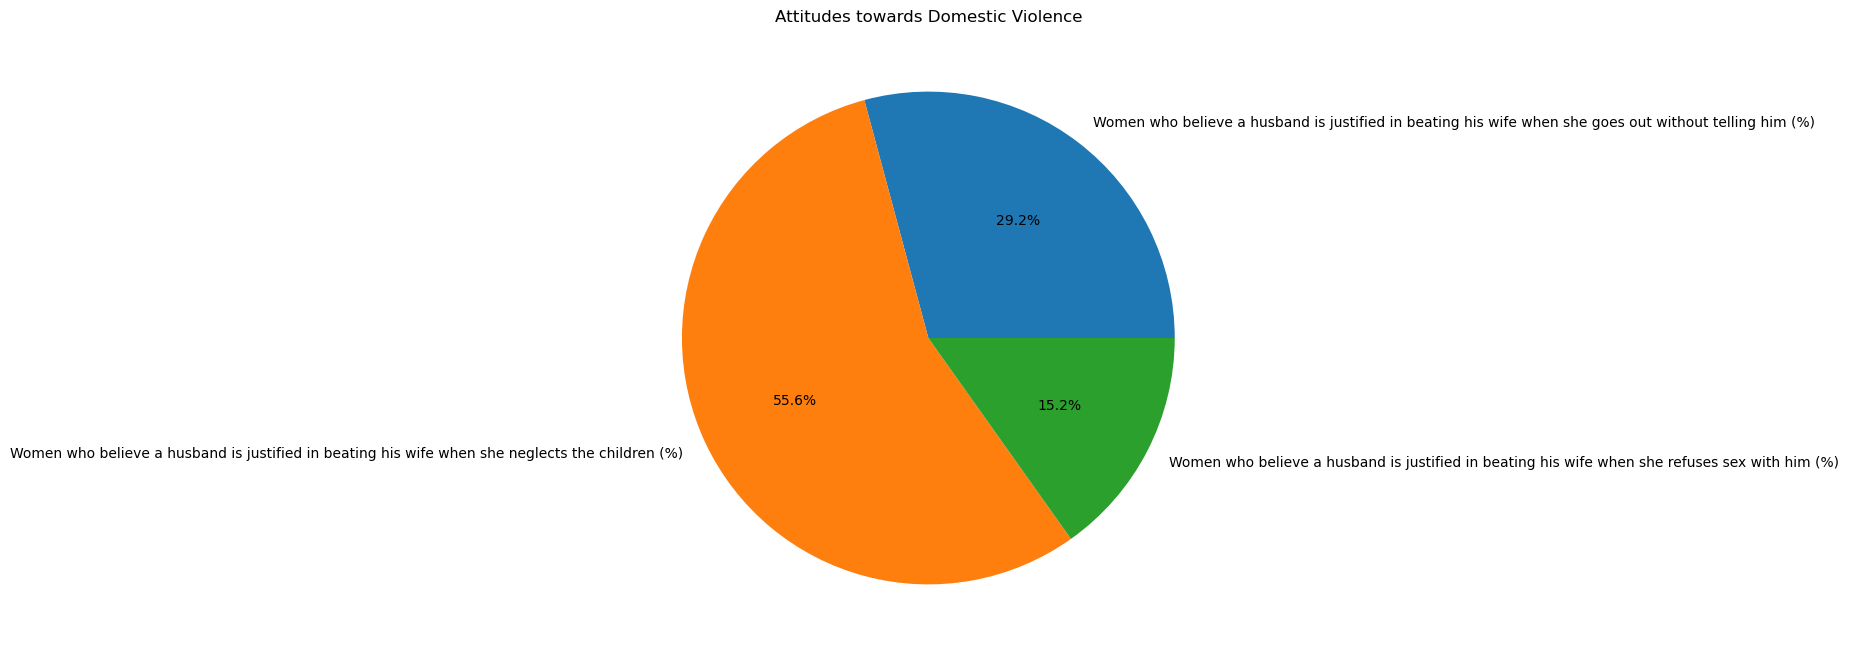

In [20]:
domestic_abuse = ['Women who believe a husband is justified in beating his wife when she neglects the children (%): Q1 (lowest)', 
                    'Women who believe a husband is justified in beating his wife when she neglects the children (%): Q2', 
                    'Women who believe a husband is justified in beating his wife when she neglects the children (%): Q4', 
                    'Women who believe a husband is justified in beating his wife when she neglects the children (%): Q5', 
                    'Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q1 (lowest)', 
                    'Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q2', 
                    'Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q4', 
                    'Women who believe a husband is justified in beating his wife when she refuses sex with him (%): Q5', 
                    'Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q1 (lowest)', 
                    'Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q2',
                    'Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q4', 
                    'Women who believe a husband is justified in beating his wife when she goes out without telling him (%): Q5']

filtered_women_column = df.loc[df["Women's Rights and Empowerment"].isin(domestic_abuse)].copy()

filtered_women_column['Category'] = filtered_women_column["Women's Rights and Empowerment"].apply(lambda x: x.split(':')[0])

average_values = filtered_women_column.groupby("Category")['Value'].mean().reset_index()

plt.figure(figsize=(10,8))
plt.pie(average_values['Value'], labels = average_values['Category'], autopct='%1.1f%%')
plt.title("Attitudes towards Domestic Violence")
plt.show()


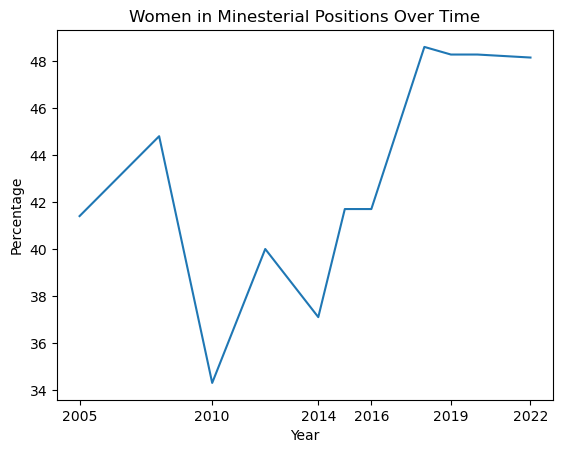

In [26]:
minesterial_women = df.loc[df["Women's Rights and Empowerment"] == 'Proportion of women in ministerial level positions (%)']

pivot_data = minesterial_women.pivot(index = 'Year', columns = "Women's Rights and Empowerment", values = 'Value')

plt.plot(pivot_data.index, pivot_data['Proportion of women in ministerial level positions (%)'])
plt.title('Women in Minesterial Positions Over Time')
plt.ylabel('Percentage')
plt.xlabel('Year')

#setting x axis ticks to intervals of 2 years
years = pivot_data.index
plt.xticks(years[::2])
plt.show()

In [27]:
df

,Indicator Name,Year,Value,Health and Mortality,Labour and Employment,Women's Rights and Empowerment,Education,Technology and Financial Access,Demographics,Economic Indicators,Family Planning and Care Giving
0,"Received government transfer or pension, male ...",2021,30.050,None,None,None,None,"Received government transfer or pension, male ...",None,None,None
1,"Received government transfer or pension, male ...",2017,20.990,None,None,None,None,"Received government transfer or pension, male ...",None,None,None
2,"Population ages 70-74, male",2023,345767.000,None,None,None,None,None,"Population ages 70-74, male",None,None
3,"Population ages 70-74, male",2022,347139.000,None,None,None,None,None,"Population ages 70-74, male",None,None
4,"Population ages 70-74, male",2021,347923.000,None,None,None,None,None,"Population ages 70-74, male",None,None
...,...,...,...,...,...,...,...,...,...,...,...
16050,Sex ratio at birth (male births per female bir...,1964,1.040,None,None,None,None,None,None,None,None
16051,Sex ratio at birth (male births per female bir...,1963,1.040,None,None,None,None,None,None,None,None
16052,Sex ratio at birth (male births per female bir...,1962,1.040,None,None,None,None,None,None,None,None
16053,Sex ratio at birth (male births per female bir...,1961,1.040,None,None,None,None,None,None,None,None


Technology and Financial Access

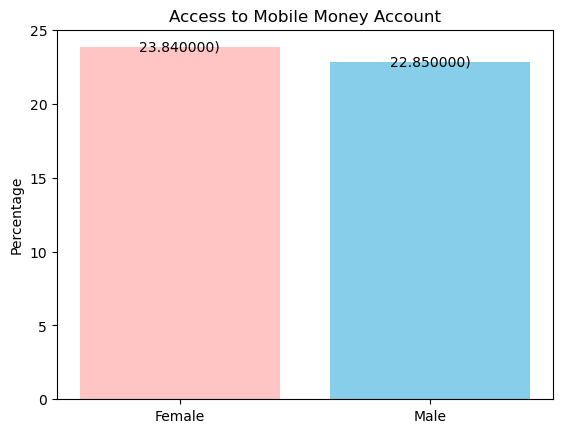

In [43]:
mobile_money_acc = ['Mobile money account, female (% age 15+)',
                   'Mobile money account, male (% age 15+)']

filtered_tech_column = df[df['Technology and Financial Access'].isin(mobile_money_acc)]

average_values = filtered_tech_column.groupby('Technology and Financial Access')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Technology and Financial Access'], average_values['Value'], color = colour)
plt.title('Access to Mobile Money Account')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

In [37]:
df['Technology and Financial Access'].unique()

array(['Received government transfer or pension, male (% age 15+)', None,
       'Received government transfer or pension, female (% age 15+)',
       'Borrowed for health or medical purposes (% age 15+)',
       'Most worrying financial issue: money for old age, male (% age 15+)',
       'Borrowed for education or school fees (% age 15+)',
       'Most worrying financial issue: money for old age, female (% age 15+)',
       'Mobile money account (% age 15+)',
       'Made or received a digital payment (% age 15+)',
       "Reason for not having a mobile money account: don't have the necessary documentation (% without an account, age 15+)",
       'Borrowed from a store by buying on credit (% age 15+)',
       'Borrowed to start, operate, or expand a farm or business, female (% age 15+)',
       'Saved money using a mobile money account (% age 15+)',
       'Borrowed to start, operate, or expand a farm or business, male (% age 15+)',
       'Made a digital in-store merchant payment for

In [51]:
if 'Made or received a digital payment, female (% age 15+)' in df['Technology and Financial Access'].values:
    print("Indicator found in 'Technology and Financial Inclusion' column.")
else:
    print("Indicator not found in column.")

Indicator found in 'Technology and Financial Inclusion' column.


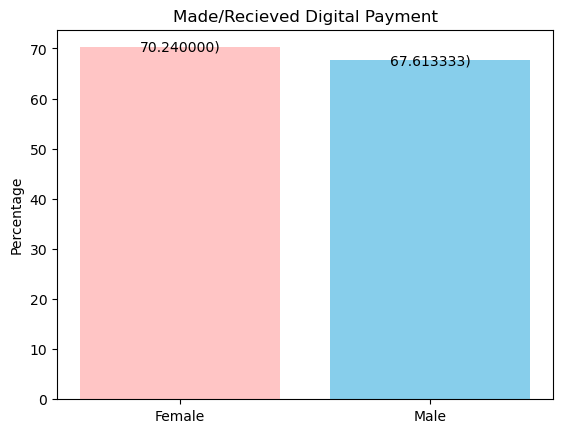

In [52]:
recieved_digital_payment = ['Made or received a digital payment, female (% age 15+)',
                           'Made or received a digital payment, male (% age 15+)']

filtered_tech_column = df[df['Technology and Financial Access'].isin(recieved_digital_payment)]

average_values = filtered_tech_column.groupby('Technology and Financial Access')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Technology and Financial Access'], average_values['Value'], color = colour)
plt.title('Made/Recieved Digital Payment')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

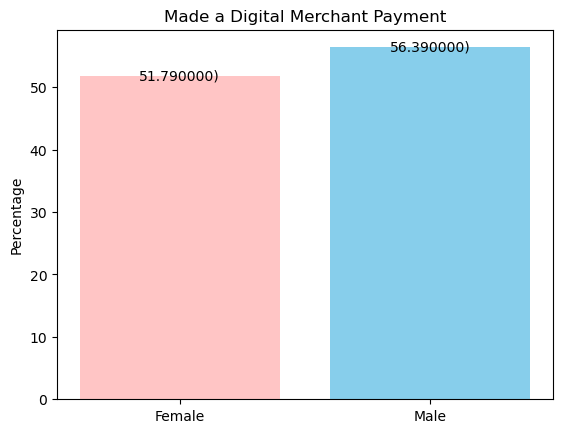

In [54]:
merchant_digital_payment = ['Made a digital merchant payment, female (% age 15+)',
                           'Made a digital merchant payment, male (% age 15+)']

filtered_tech_column = df[df['Technology and Financial Access'].isin(merchant_digital_payment)]

average_values = filtered_tech_column.groupby('Technology and Financial Access')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Technology and Financial Access'], average_values['Value'], color = colour)
plt.title('Made a Digital Merchant Payment')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

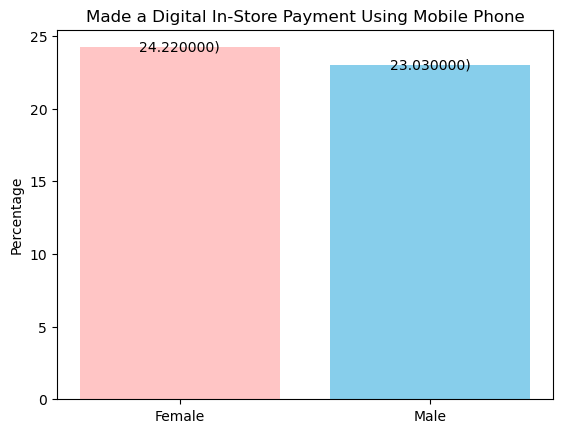

In [64]:
instore_digital_payment = ['Made a digital in-store merchant payment: using a mobile phone, female (% age 15+)',
                        'Made a digital in-store merchant payment: using a mobile phone, male (% age 15+)']

filtered_tech_column = df[df['Technology and Financial Access'].isin(covid_digital_payment)]

average_values = filtered_tech_column.groupby('Technology and Financial Access')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Technology and Financial Access'], average_values['Value'], color = colour)
plt.title('Made a Digital In-Store Payment Using Mobile Phone')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

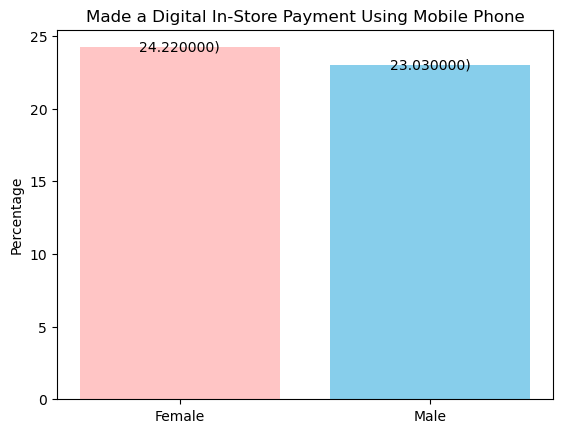

In [65]:
send_money_phone = ['Used a mobile phone or the internet to send money, female (% age 15+)',
                   'Used a mobile phone or the internet to send money, male (% age 15+)']

filtered_tech_column = df[df['Technology and Financial Access'].isin(covid_digital_payment)]

average_values = filtered_tech_column.groupby('Technology and Financial Access')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Technology and Financial Access'], average_values['Value'], color = colour)
plt.title('Made a Digital In-Store Payment Using Mobile Phone')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

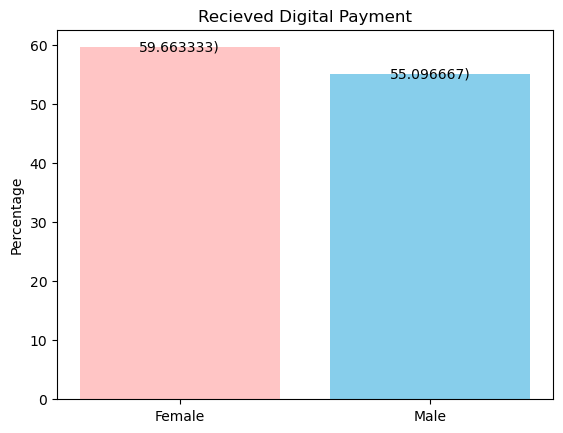

In [67]:
recieved_digital_payment = ['Received digital payments, female (% age 15+)', 
                   'Received digital payments, male (% age 15+)']

filtered_tech_column = df[df['Technology and Financial Access'].isin(recieved_digital_payment)]

average_values = filtered_tech_column.groupby('Technology and Financial Access')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Technology and Financial Access'], average_values['Value'], color = colour)
plt.title('Recieved Digital Payment')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

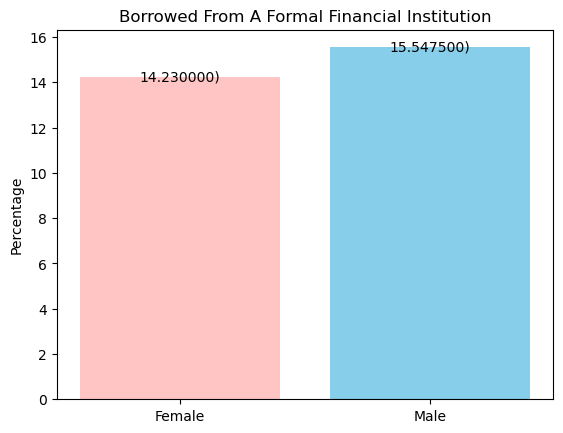

In [69]:
borrow_financial_inst = ['Borrowed from a formal financial institution, female (% age 15+)',
                           'Borrowed from a formal financial institution, male (% age 15+)']

filtered_tech_column = df[df['Technology and Financial Access'].isin(borrow_financial_inst)]

average_values = filtered_tech_column.groupby('Technology and Financial Access')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Technology and Financial Access'], average_values['Value'], color = colour)
plt.title('Borrowed From A Formal Financial Institution')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

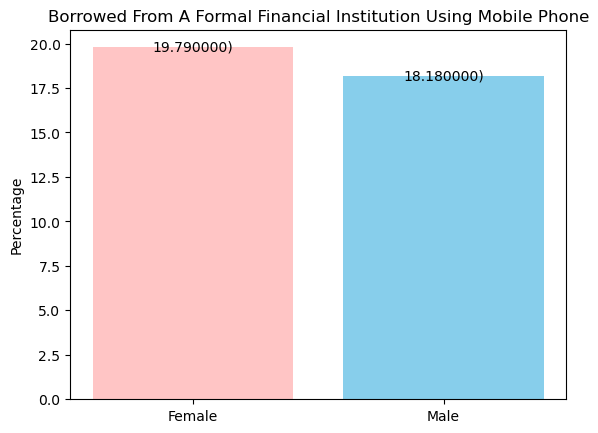

In [71]:
borrow_financial_inst_phone = ['Borrowed any money from a formal financial institution or using a mobile money account, female (% age 15+)',
                        'Borrowed any money from a formal financial institution or using a mobile money account, male (% age 15+)']

filtered_tech_column = df[df['Technology and Financial Access'].isin(borrow_financial_inst_phone)]

average_values = filtered_tech_column.groupby('Technology and Financial Access')['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Technology and Financial Access'], average_values['Value'], color = colour)
plt.title('Borrowed From A Formal Financial Institution Using Mobile Phone')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name)

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

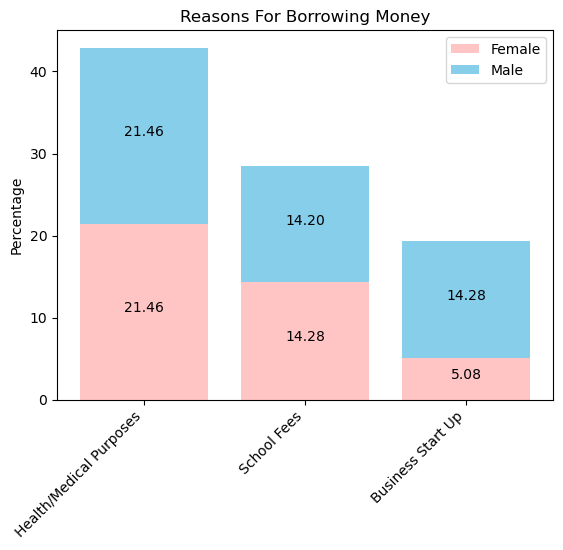

In [78]:
reasons_borrowing = ['Borrowed for health or medical purposes, female (% age 15+)',
                    'Borrowed for health or medical purposes, male (% age 15+)',
                    'Borrowed for education or school fees, female (% age 15+)',
                    'Borrowed for education or school fees, male (% age 15+)',
                    'Borrowed to start, operate, or expand a farm or business, female (% age 15+)',
                    'Borrowed to start, operate, or expand a farm or business, male (% age 15+)']
              

filtered_tech_column = df[df['Technology and Financial Access'].isin(reasons_borrowing)]

female_values = filtered_tech_column[filtered_tech_column['Technology and Financial Access'].str.contains('female')].groupby('Technology and Financial Access')['Value'].mean().reset_index()
male_values = filtered_tech_column[filtered_tech_column['Technology and Financial Access'].str.contains('male')].groupby('Technology and Financial Access')['Value'].mean().reset_index()

common_index = female_values.index.intersection(male_values.index)
female_values = female_values.loc[common_index]
male_values = male_values.loc[common_index]

xticks_name = ['Health/Medical Purposes', 'School Fees', 'Business Start Up']

plt.bar(female_values.index, female_values['Value'], label='Female', color = '#FFC5C5')
plt.bar(male_values.index, male_values['Value'], bottom=female_values['Value'], label='Male', color = '#87CEEB')
plt.title('Reasons For Borrowing Money')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')
plt.legend()

for i, (female_value, male_value) in enumerate(zip(female_values['Value'], male_values['Value'])):
    plt.text(i, female_value/2, f"{female_value:.2f}", ha='center')
    plt.text(i, female_value + male_value/2, f"{male_value:.2f}", ha='center')

    
plt.show()

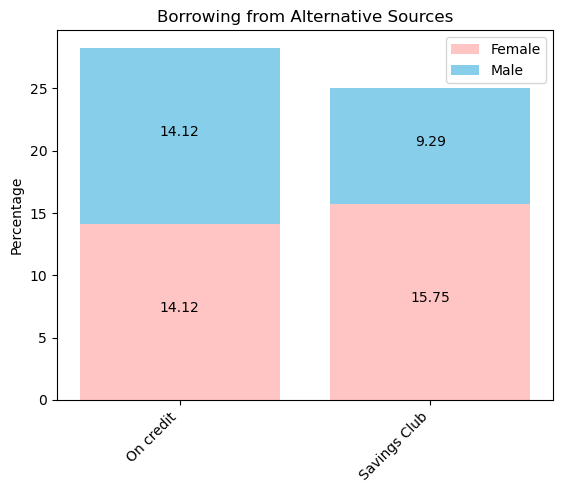

In [79]:
borrowing_methods = ['Borrowed from a store by buying on credit, female (% age 15+)',
                    'Borrowed from a store by buying on credit, male (% age 15+)',
                    'Borrowed from a savings club, female (% age 15+)',
                    'Borrowed from a savings club, male (% age 15+)']
              

filtered_tech_column = df[df['Technology and Financial Access'].isin(borrowing_methods)]

female_values = filtered_tech_column[filtered_tech_column['Technology and Financial Access'].str.contains('female')].groupby('Technology and Financial Access')['Value'].mean().reset_index()
male_values = filtered_tech_column[filtered_tech_column['Technology and Financial Access'].str.contains('male')].groupby('Technology and Financial Access')['Value'].mean().reset_index()

common_index = female_values.index.intersection(male_values.index)
female_values = female_values.loc[common_index]
male_values = male_values.loc[common_index]

xticks_name = ['On credit', 'Savings Club']

plt.bar(female_values.index, female_values['Value'], label='Female', color = '#FFC5C5')
plt.bar(male_values.index, male_values['Value'], bottom=female_values['Value'], label='Male', color = '#87CEEB')
plt.title('Borrowing from Alternative Sources')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')
plt.legend()

for i, (female_value, male_value) in enumerate(zip(female_values['Value'], male_values['Value'])):
    plt.text(i, female_value/2, f"{female_value:.2f}", ha='center')
    plt.text(i, female_value + male_value/2, f"{male_value:.2f}", ha='center')

    
plt.show()

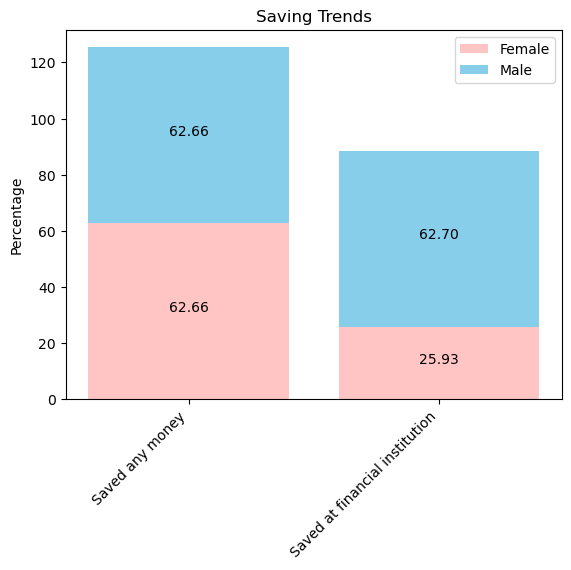

In [87]:
savings = ['Saved any money, female (% age 15+)',
          'Saved any money, male (% age 15+)',
          'Saved at a financial institution, female (% age 15+)',
          'Saved at a financial institution, male (% age 15+)']
              

filtered_tech_column = df[df['Technology and Financial Access'].isin(savings)]

female_values = filtered_tech_column[filtered_tech_column['Technology and Financial Access'].str.contains('female')].groupby('Technology and Financial Access')['Value'].mean().reset_index()
male_values = filtered_tech_column[filtered_tech_column['Technology and Financial Access'].str.contains('male')].groupby('Technology and Financial Access')['Value'].mean().reset_index()

common_index = female_values.index.intersection(male_values.index)
female_values = female_values.loc[common_index]
male_values = male_values.loc[common_index]

xticks_name = ['Saved any money', 'Saved at financial institution']

plt.bar(female_values.index, female_values['Value'], label='Female', color = '#FFC5C5')
plt.bar(male_values.index, male_values['Value'], bottom=female_values['Value'], label='Male', color = '#87CEEB')
plt.title('Saving Trends')
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')
plt.legend()

for i, (female_value, male_value) in enumerate(zip(female_values['Value'], male_values['Value'])):
    plt.text(i, female_value/2, f"{female_value:.2f}", ha='center')
    plt.text(i, female_value + male_value/2, f"{male_value:.2f}", ha='center')

    
plt.show()

Demographics

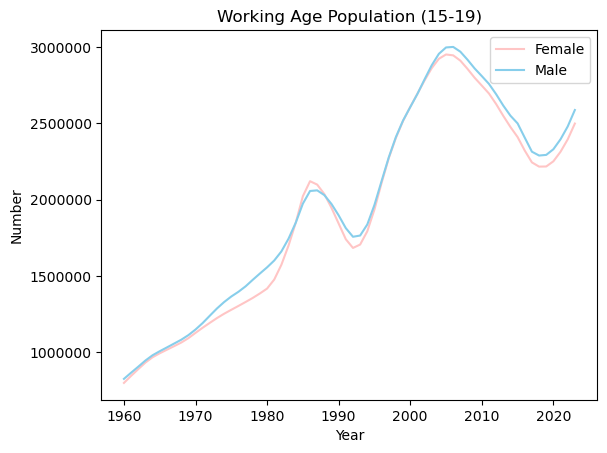

In [55]:
population_15_to_19 = df.loc[df['Demographics'].isin(['Population ages 15-19, female',
                                                     'Population ages 15-19, male'])]

pivot_data = population_15_to_19.pivot(index = 'Year', columns = 'Demographics', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Population ages 15-19, female'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Population ages 15-19, male'], label = 'Male',  color ='#87CEEB')
plt.title('Working Age Population (15-19)')
plt.ylabel('Number')
plt.xlabel('Year')

#Formatting y axis tick labels to show values accurately as shown in the dataset
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()

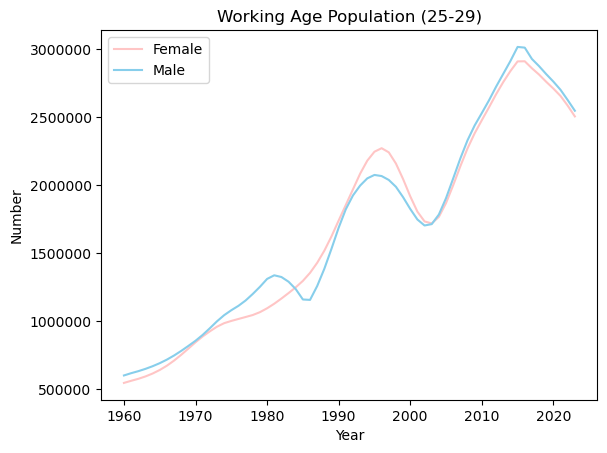

In [54]:
population_25_to_29 = df.loc[df['Demographics'].isin(['Population ages 25-29, female',
                                                     'Population ages 25-29, male'])]

pivot_data = population_25_to_29.pivot(index = 'Year', columns = 'Demographics', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Population ages 25-29, female'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Population ages 25-29, male'], label = 'Male',  color ='#87CEEB')
plt.title('Working Age Population (25-29)')
plt.ylabel('Number')
plt.xlabel('Year')
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()

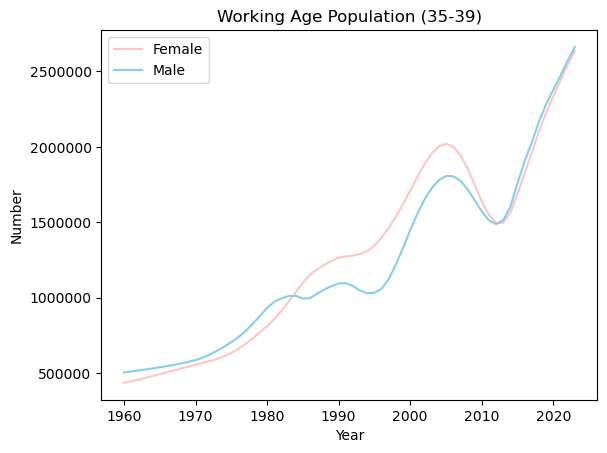

In [56]:
population_35_to_39 = df.loc[df['Demographics'].isin(['Population ages 35-39, female',
                                                     'Population ages 35-39, male'])]

pivot_data = population_35_to_39.pivot(index = 'Year', columns = 'Demographics', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Population ages 35-39, female'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Population ages 35-39, male'], label = 'Male',  color ='#87CEEB')
plt.title('Working Age Population (35-39)')
plt.ylabel('Number')
plt.xlabel('Year')
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()

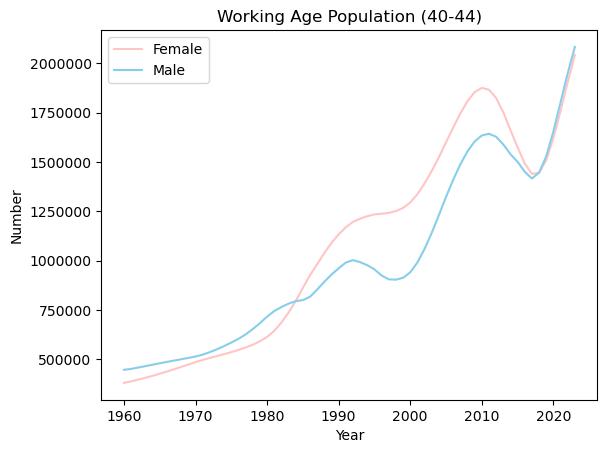

In [57]:
population_40_to_44 = df.loc[df['Demographics'].isin(['Population ages 40-44, female',
                                                     'Population ages 40-44, male'])]

pivot_data = population_40_to_44.pivot(index = 'Year', columns = 'Demographics', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Population ages 40-44, female'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Population ages 40-44, male'], label = 'Male',  color ='#87CEEB')
plt.title('Working Age Population (40-44)')
plt.ylabel('Number')
plt.xlabel('Year')
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()

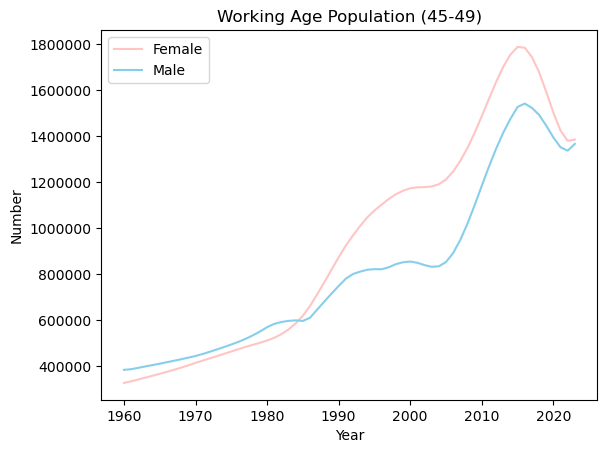

In [58]:
population_45_to_49 = df.loc[df['Demographics'].isin(['Population ages 45-49, female',
                                                     'Population ages 45-49, male'])]

pivot_data = population_45_to_49.pivot(index = 'Year', columns = 'Demographics', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Population ages 45-49, female'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Population ages 45-49, male'], label = 'Male',  color ='#87CEEB')
plt.title('Working Age Population (45-49)')
plt.ylabel('Number')
plt.xlabel('Year')
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()

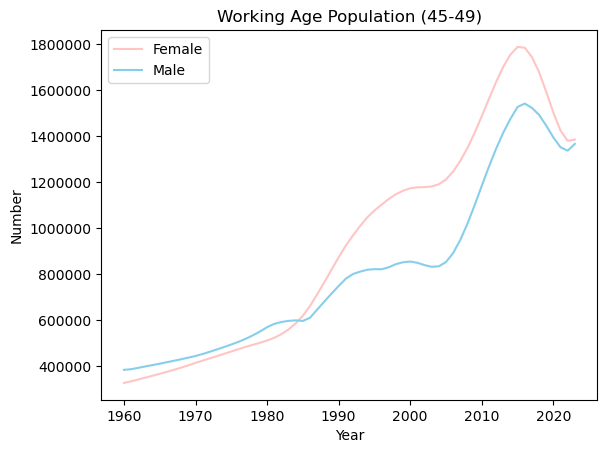

In [60]:
population_45_to_49 = df.loc[df['Demographics'].isin(['Population ages 45-49, female',
                                                     'Population ages 45-49, male'])]

pivot_data = population_45_to_49.pivot(index = 'Year', columns = 'Demographics', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Population ages 45-49, female'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Population ages 45-49, male'], label = 'Male',  color ='#87CEEB')
plt.title('Working Age Population (45-49)')
plt.ylabel('Number')
plt.xlabel('Year')
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()

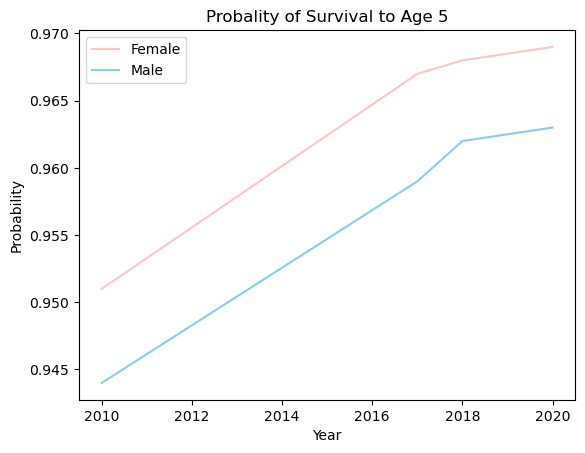

In [161]:
survival_to_5 = df.loc[df['Demographics'].isin(['Probability of Survival to Age 5, Female',
                                               'Probability of Survival to Age 5, Male'])]

pivot_data = survival_to_5.pivot(index = 'Year', columns = 'Demographics', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Probability of Survival to Age 5, Female'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Probability of Survival to Age 5, Male'], label = 'Male',  color ='#87CEEB')
plt.title('Probality of Survival to Age 5')
plt.ylabel('Probability')
plt.xlabel('Year')
plt.legend()
plt.show()

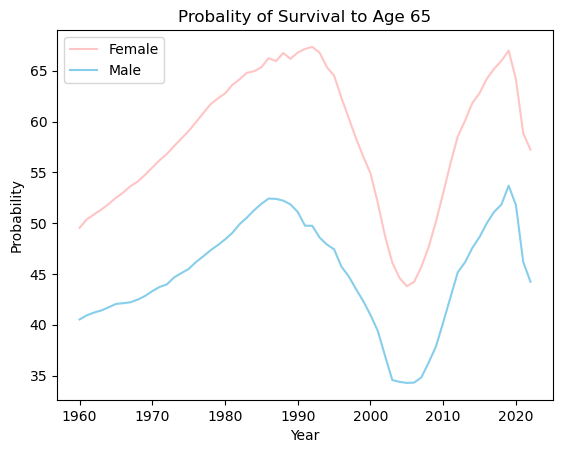

In [192]:
survival_to_65 = df.loc[df['Demographics'].isin(['Survival to age 65, female (% of cohort)',
                                               'Survival to age 65, male (% of cohort)'])]

pivot_data = survival_to_65.pivot(index = 'Year', columns = 'Demographics', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Survival to age 65, female (% of cohort)'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Survival to age 65, male (% of cohort)'], label = 'Male',  color ='#87CEEB')
plt.title('Probality of Survival to Age 65')
plt.ylabel('Probability')
plt.xlabel('Year')
plt.legend()
plt.show()

Economic Indicators

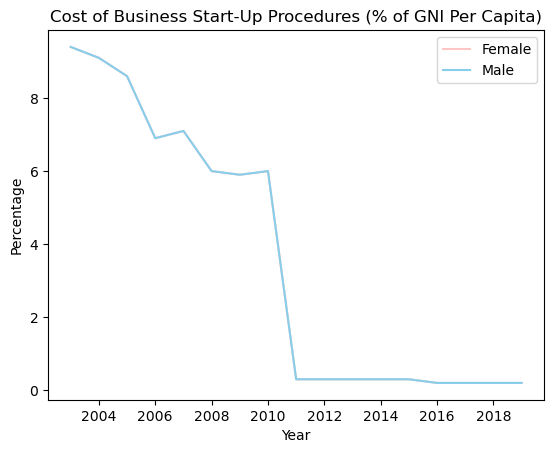

In [72]:
business_start_up = df.loc[df['Economic Indicators'].isin(['Cost of business start-up procedures, female (% of GNI per capita)',
                                                          'Cost of business start-up procedures, male (% of GNI per capita)'])]

pivot_data = business_start_up.pivot(index = 'Year', columns = 'Economic Indicators', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Cost of business start-up procedures, female (% of GNI per capita)'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Cost of business start-up procedures, male (% of GNI per capita)'], label = 'Male',  color ='#87CEEB')
plt.title('Cost of Business Start-Up Procedures (% of GNI Per Capita)')
plt.ylabel('Percentage')
plt.xlabel('Year')
plt.legend()
plt.show()

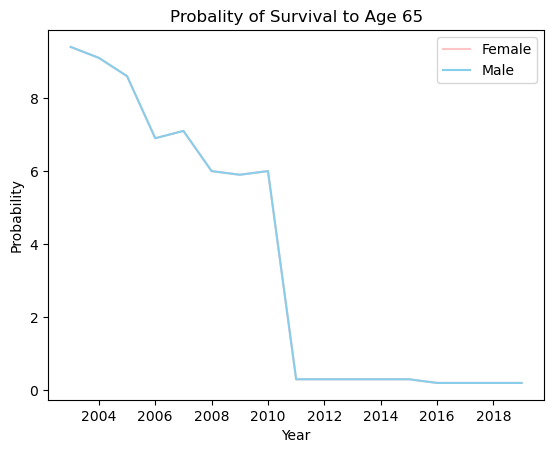

In [14]:
business_startup = df.loc[df['Economic Indicators'].isin(['Cost of business start-up procedures, female (% of GNI per capita)',
                                                        'Cost of business start-up procedures, male (% of GNI per capita)'])]

pivot_data = business_startup.pivot(index = 'Year', columns = 'Economic Indicators', values = 'Value')

plt.plot(pivot_data.index, pivot_data['Cost of business start-up procedures, female (% of GNI per capita)'], label = 'Female', color = '#FFC5C5')
plt.plot(pivot_data.index, pivot_data['Cost of business start-up procedures, male (% of GNI per capita)'], label = 'Male',  color ='#87CEEB')
plt.title('Probality of Survival to Age 65')
plt.ylabel('Probability')
plt.xlabel('Year')
plt.legend()
plt.show()

Housing and Property

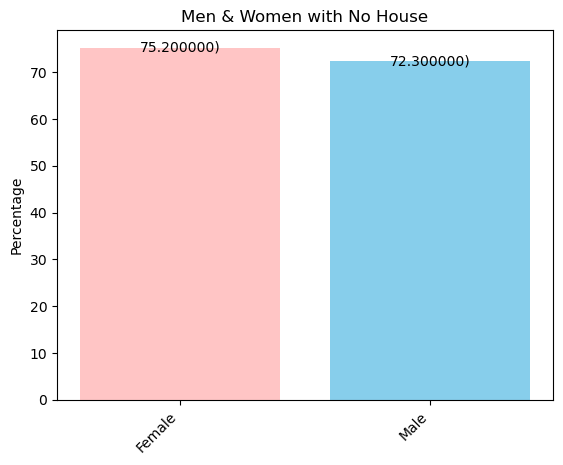

In [26]:
no_house = ['Women who do not own a house (% of women age 15-49)',
             'Men who do not own a house (% of men)']

filtered_housing_column = df[df['Housing and Property'].isin(no_house)]

average_values = filtered_housing_column.groupby("Housing and Property")['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Housing and Property'], average_values['Value'], color = colour)
plt.title("Men & Women with No House")
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

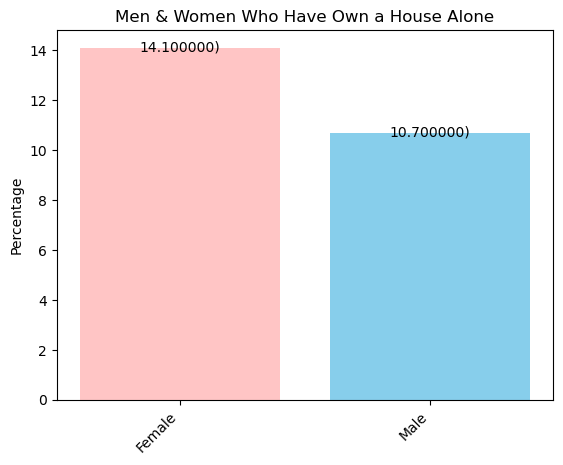

In [32]:
have_house = ['Women who own a house alone (% of women age 15-49)',
             'Men who own a house alone (% of men)']

filtered_housing_column = df[df['Housing and Property'].isin(have_house)]

average_values = filtered_housing_column.groupby("Housing and Property")['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Housing and Property'], average_values['Value'], color = colour)
plt.title("Men & Women Who Have Own a House Alone")
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()

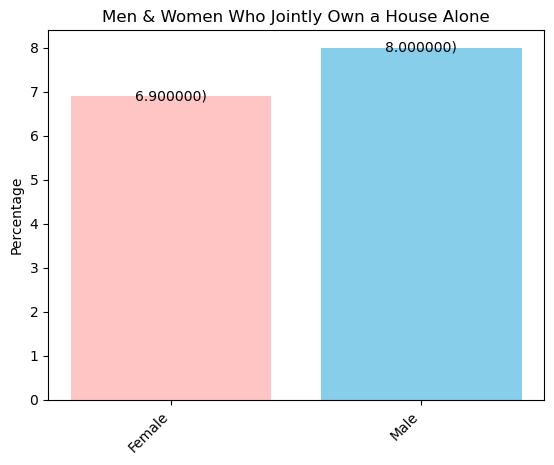

In [37]:
jointly_house = ['Women who own a house jointly (% of women age 15-49)',
                'Men who own a house jointly (% of men)']

filtered_housing_column = df[df['Housing and Property'].isin(jointly_house)]

average_values = filtered_housing_column.groupby("Housing and Property")['Value'].mean().reset_index()

xticks_name = ['Female', 'Male']

colour = ['#FFC5C5' if i == 0 else '#87CEEB' for i in range(len(average_values))]

plt.bar(average_values['Housing and Property'], average_values['Value'], color = colour)
plt.title("Men & Women Who Jointly Own a House Alone")
plt.ylabel('Percentage')
plt.xticks(ticks = range(len(xticks_name)), labels = xticks_name, rotation = 45, ha = 'right')

for i, (value, label) in enumerate(zip(average_values['Value'], xticks_name)):
    plt.text(i, value, f"{value:1f})", ha = 'center', va = 'center')
    
plt.show()